# import library

In [31]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter('ignore')
import os
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers.default = 'iframe'

# Section 1

## Reading data

In [ ]:
data = pd.read_csv("Dataset/data_season.csv")

## Change to DataFrame

In [33]:
df = pd.DataFrame(data)
df

Year   Location   Area  Rainfall  Temperature Soil type Irrigation  \
0     2004  Mangalore   1279    2903.1         27.0  Alluvial       Drip   
1     2004  Mangalore  13283    2903.1         27.0  Alluvial       Drip   
2     2004  Mangalore  52119    2903.1         27.0  Alluvial       Drip   
3     2004  Mangalore    725    2996.6         27.0  Alluvial       Drip   
4     2004  Mangalore  12885    2996.6         27.0  Alluvial       Drip   
...    ...        ...    ...       ...          ...       ...        ...   
3153  2013  Davangere  46990    3296.0         27.0       NaN       Drip   
3154  2014  Davangere    103    3296.0         27.0       NaN       Drip   
3155  2015  Davangere   8239    3550.0         27.0       NaN       Drip   
3156  2016  Davangere  44563    3550.0         27.0       NaN       Drip   
3157  2017  Davangere     96    3550.0         27.0       NaN       Drip   

        yeilds  Humidity    Crops   price  Season  
0       2570.0      57.0  Coconut  200000  Kharif  
1      27170.0      57.5  Coconut    4847  Kharif  
2     114744.0      57.0  Coconut   51239  Kharif  
3       1402.0      55.0  Coconut  216396  Kharif  
4      23456.0      56.0  Coconut    2644  Kharif  
...        ...       ...      ...     ...     ...  
3153  107809.0      53.5  Coconut   51239    Rabi  
3154    1132.0      52.5  Coconut  216396    Rabi  
3155   23960.0      56.0  Coconut    2644    Rabi  
3156  126487.0      57.0  Coconut   44235    Rabi  
3157     804.0      57.5  Coconut  203317    Rabi  

[3158 rows x 12 columns]

## Brief explanation about this data

<font size=3>
Year:<br>
Agricultural harvest year<br><br>
Location:<br>
The name of the region or city (such as Mangalore) from which the data was collected<br>
Area:<br><br>
Area under crop cultivation (possibly in hectares or square meters)<br>
Rainfall:<br><br>
The amount of precipitation in that area and year, probably in millimeters (mm)<br>
Temperature:<br><br>
Average temperature during the growing season, probably in degrees Celsius<br>
Soil type:<br><br>
Soil type of the area (e.g. Alluvial, Red, Laterite, etc.)<br>
Irrigation:<br><br>
Type of irrigation method (e.g. Drip, Canal, Well, etc.)<br>
yields:<br><br>
Amount of product harvested (e.g. kilograms or tons)<br>
Humidity:<br><br>
Average air humidity during the cultivation period (percentage)<br>
crops:<br><br>
Name of agricultural product (such as Coconut, Rice, Maize, etc.)<br>
Price:<br><br>
Product price (probably in Indian Rupees)<br><br>
Season:<br>
Cropping season, such as Kharif, Rabi, or Summer

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3158 non-null   int64  
 3   Rainfall     3158 non-null   float64
 4   Temperature  3158 non-null   float64
 5   Soil type    3100 non-null   object 
 6   Irrigation   3158 non-null   object 
 7   yeilds       3158 non-null   float64
 8   Humidity     3158 non-null   float64
 9   Crops        3158 non-null   object 
 10  price        3158 non-null   int64  
 11  Season       3158 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 296.2+ KB


In [35]:
print(f"row: {df.shape[0]}\ncolumns: {df.shape[1]}")

row: 3158
columns: 12


## checking missing values

In [36]:
# checking missing values
df_missing_values = pd.DataFrame(
    {
        "columns": df.columns,
        "missing values": df.isna().sum(),
        "percent missing values": (df.isna().sum() / len(df) * 100)
    }
)
df_missing_values.reset_index(inplace=True, drop=True)
df_missing_values

columns  missing values  percent missing values
0          Year               0                0.000000
1      Location               0                0.000000
2          Area               0                0.000000
3      Rainfall               0                0.000000
4   Temperature               0                0.000000
5     Soil type              58                1.836605
6    Irrigation               0                0.000000
7        yeilds               0                0.000000
8      Humidity               0                0.000000
9         Crops               0                0.000000
10        price               0                0.000000
11       Season               0                0.000000

<font size=2>number of missing values:<font><br>
Soil type: 58

## unique values

In [37]:
for col in df.columns:
    print(f"unique values '{col}':\n{df[col].unique()}")
    print("_" * 80)

unique values 'Year':
[2004 2013 2014 2015 2016 2017 2018 2005 2006 2007 2008 2009 2010 2011
 2012 2019]
________________________________________________________________________________
unique values 'Location':
['Mangalore' 'Kodagu' 'Kasaragodu' 'Raichur' 'Gulbarga' 'Madikeri'
 'Hassan' 'Mysuru' 'Chikmangaluru' 'Bangalore' 'Davangere']
________________________________________________________________________________
unique values 'Area':
[ 1279 13283 52119   725 12885 51179   468 11841 50975   206 10922 51390
   177 10723 51709   146 10910 51355   160 10912 51353   142 10505 51040
   154 10318 48083   143  9283 47200   158  8982 46990   103  8239 44563
    96  6949 44663   110  6824 43013    95  6441  4012  4877  4930  4954
  5019  5127  5174  5294  5474  5864  7028  7403  7501  7714  7856    32
     1    30     6    15     4    39    12     3    17     9    21    11
     8    29 13736 14003 14179 14319 14464 14876 14976 15009 15114 16224
 17095 17512 17587 17771 17825  3147  2578  159

## handling missing values

<font size=2>There are a lot of suspicious values in the columns like:<br>
"?" , "_"<br>
Let's check them out<br><font>

In [38]:
Abbreviations = ["?", "_"]

In [39]:
df.replace(Abbreviations, np.nan, inplace=True)

In [40]:
df.dropna(inplace=True)

<font size=3>We saw how many and what percentage of missing values each column has and how many and what percentage of rows are deleted due to missing values<font>

<font size=3>The number of missing valuesis low and 70 rows out of 3158 are deleted due to missing values.<br>
I don't know the data source.<br>
I will delete it.
<font>

<font size=3>
In data I saw that it had '?' and '_' values<br>
which I replaced with the missing value and then deleted.
<font>

In [41]:
df.describe(include="all")

Year Location          Area     Rainfall  Temperature  \
count   3100.000000     3100   3100.000000  3100.000000  3100.000000   
unique          NaN        9           NaN          NaN          NaN   
top             NaN   Hassan           NaN          NaN          NaN   
freq            NaN      798           NaN          NaN          NaN   
mean    2009.873871      NaN   9257.195484  2810.782484    64.109903   
std        5.102236      NaN  15085.890438  1164.652349    59.113890   
min     2004.000000      NaN      1.000000   233.000000    26.800000   
25%     2004.000000      NaN    146.000000  2903.100000    27.000000   
50%     2010.000000      NaN   2127.000000  3296.000000    38.000000   
75%     2015.000000      NaN  10910.000000  3550.000000    43.000000   
max     2019.000000      NaN  52119.000000  3729.800000   222.000000   

       Soil type Irrigation         yeilds     Humidity    Crops  \
count       3100       3100    3100.000000  3100.000000     3100   
unique        27          3            NaN          NaN       13   
top     Alluvial       Drip            NaN          NaN  Coconut   
freq         459       1276            NaN          NaN     1449   
mean         NaN        NaN   23420.381323    55.584000      NaN   
std          NaN        NaN   58404.168684     2.470155      NaN   
min          NaN        NaN       2.000000    50.000000      NaN   
25%          NaN        NaN     393.000000    54.000000      NaN   
50%          NaN        NaN    2783.000000    56.000000      NaN   
75%          NaN        NaN    7157.000000    57.000000      NaN   
max          NaN        NaN  623687.000000    60.000000      NaN   

                price Season  
count     3100.000000   3100  
unique            NaN      3  
top               NaN   Rabi  
freq              NaN   1734  
mean     86262.232903    NaN  
std      94126.738584    NaN  
min        637.000000    NaN  
25%       2644.000000    NaN  
50%      45186.000000    NaN  
75%     203317.000000    NaN  
max     249978.000000    NaN

# Section 2

In [42]:
df.columns

Index(['Year', 'Location', 'Area', 'Rainfall', 'Temperature', 'Soil type',
       'Irrigation', 'yeilds', 'Humidity', 'Crops', 'price', 'Season'],
      dtype='object')

In [43]:
class font:
    title_font = 15
    xy_font = 13
    tick = 12
    tite_legend = 12
    font_legend = 11

## Year

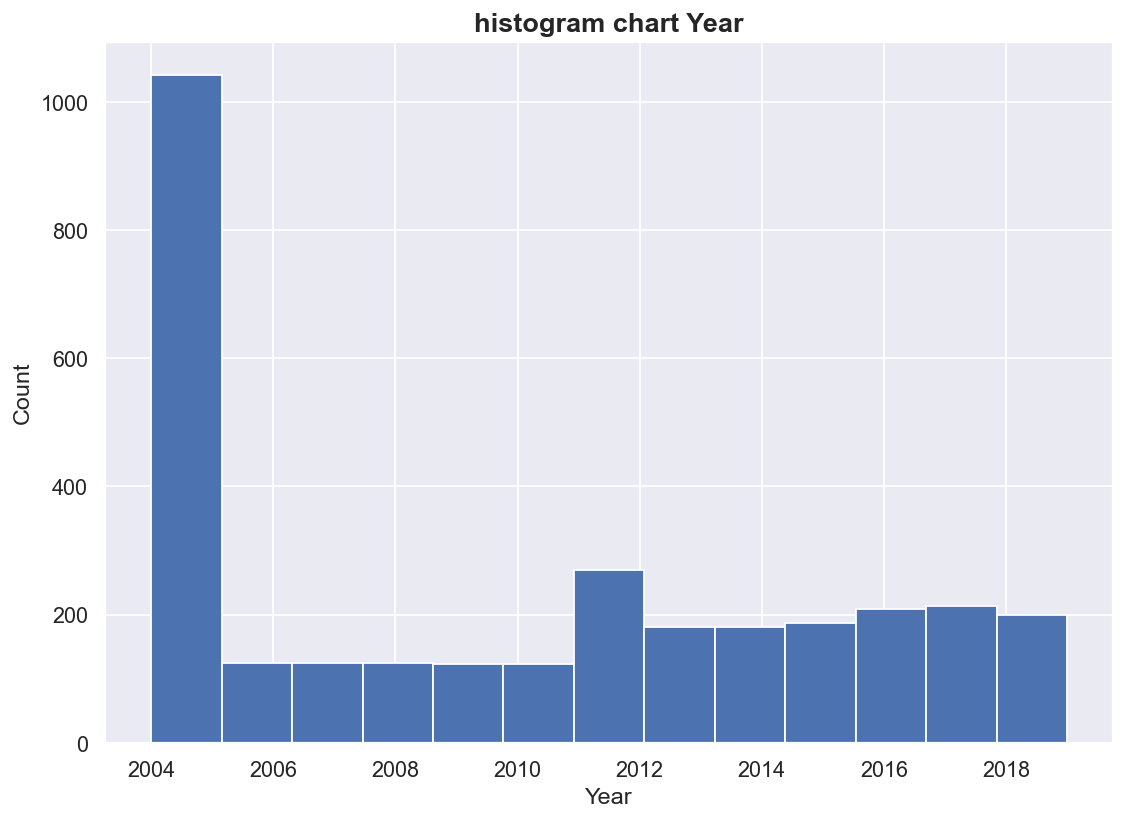

In [44]:
sns.set_style(style="darkgrid")
sns.set_theme(context="notebook")
plt.figure(figsize=(10, 7), dpi=130)
sns.histplot(data=df, x=df["Year"], alpha=1)
plt.title(
    label="histogram chart Year",
    fontsize=font.title_font,
    fontweight="bold",
)
plt.xlabel(xlabel="Year", fontsize=font.xy_font)
plt.ylabel(ylabel="Count", fontsize=font.xy_font)
plt.tick_params(axis="both", labelsize=font.tick)
plt.show()

## Location

In [45]:
Location_count = df["Location"].value_counts().reset_index()
Location_count.sort_values(by="count", inplace=True)
Location_count

Location  count
8         Kodagu    192
7         Mysuru    222
6        Raichur    231
5     Kasaragodu    231
4       Madikeri    240
3  Chikmangaluru    340
2      Mangalore    342
1       Gulbarga    504
0         Hassan    798

In [46]:
fig = px.bar(
    Location_count,  
    x="Location",   
    y="count",  
    color="count",  
    color_continuous_scale="Viridis",
    title = "Location count",
    labels={"count": "count", "Location": "Location"}
)
fig.update_layout(
    template="plotly_dark",
    height=650,
    title_font=dict(size=22, family="Arial Black", color="gold"),
    title_x=0.5
)
fig.write_html("plot.html")
fig.show()

In [47]:
fig = px.pie(
    data_frame=Location_count,
    values="count",
    names="Location",
    title="Pie Chart Location",
    color="count",
    color_discrete_sequence=px.colors.diverging.Portland,
    hole=0.4,
)

fig.update_traces(
    textinfo="percent+label",
    textfont_size=14, 
    marker=dict(line=dict(color="#000000", width=4)),
)

fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=24, family="Arial Black"),
    legend_title_text="Location",
    legend=dict(font=dict(size=14)),
    height=650,
    title_x = 0.5
)

fig.show()

<font size=3>
We found that 'hassan' is the most common location in the data

## Area

In [48]:
fig = make_subplots(rows=2, cols=1, subplot_titles=["Histogram chart Area", "Box chart Area"])

# --- Histogram ---
hist = px.histogram(df, x="Area", nbins=15)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(df, x="Area")
for trace in box.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_layout(
    template="plotly_dark",
    height=900,
    width=700,
    showlegend=False,
)

fig.update_xaxes(title_text="Area", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Area", row=2, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)

fig.show()

## Rainfall

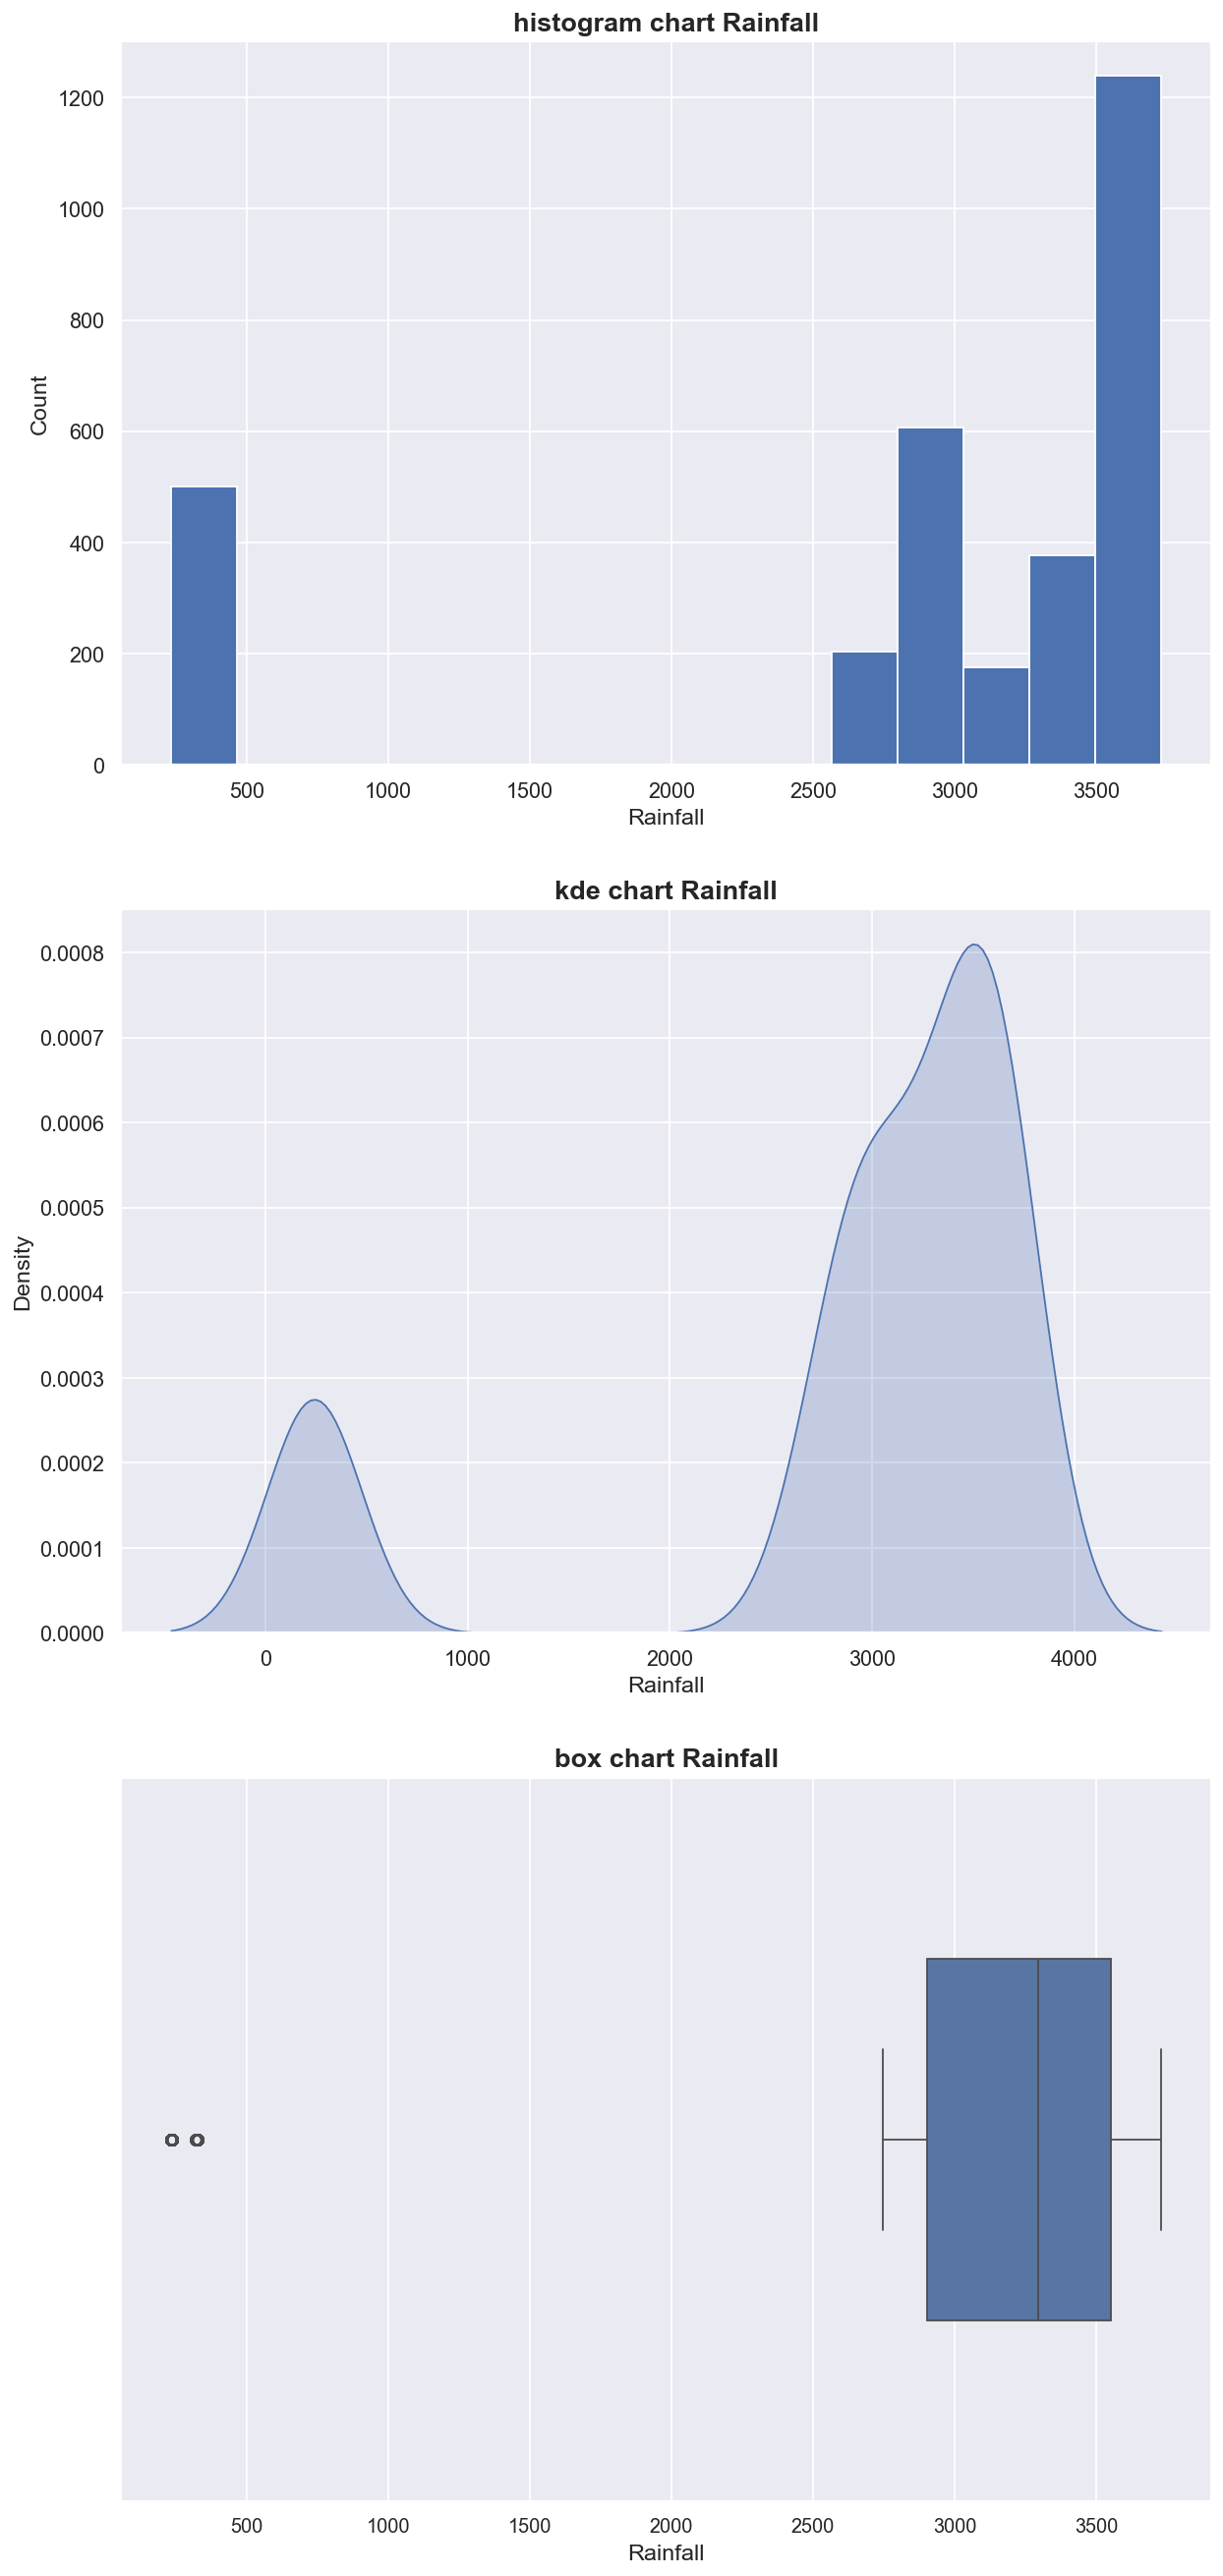

In [49]:
sns.set_style(style="darkgrid")
sns.set_theme(context="notebook")
plt.figure(figsize=(11, 25), dpi=130)
plt.subplot(3, 1, 1)
sns.histplot(data=df, x=df["Rainfall"], alpha=1, bins=15)
plt.title(
    label="histogram chart Rainfall",
    fontsize=font.title_font,
    fontweight="bold",
)
plt.xlabel("Rainfall", fontsize=font.xy_font)
plt.ylabel("Count", fontsize=font.xy_font)
plt.tick_params(axis="both", labelsize=font.tick)
plt.subplot(3, 1, 2)
sns.kdeplot(data=df, x=df["Rainfall"], fill=True)
plt.title(
    label="kde chart Rainfall",
    fontsize=font.title_font,
    fontweight="bold",
)
plt.xlabel("Rainfall", fontsize=font.xy_font)
plt.ylabel("Density", fontsize=font.xy_font)
plt.tick_params(axis="both", labelsize=font.tick)
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x=df["Rainfall"], width=0.5)
plt.title(
    label="box chart Rainfall",
    fontsize=font.title_font,
    fontweight="bold",
)
plt.xlabel("Rainfall", fontsize=font.xy_font)
plt.show()

In [50]:
fig = make_subplots(rows=2, cols=1, subplot_titles=["Histogram chart Rainfall", "Box chart Area"])

# --- Histogram ---
hist = px.histogram(df, x="Rainfall", nbins=20)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(df, x="Rainfall")
for trace in box.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_layout(
    template="plotly_dark",
    height=900,
    width=670,
    showlegend=False,
)

fig.update_xaxes(title_text="Rainfall", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Rainfall", row=2, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_layout(bargap=0.1)

fig.show()

## Temperature

In [51]:
fig = make_subplots(rows=2, cols=1, subplot_titles=["Histogram chart Temperature", "Box chart Temperature"])

# --- Histogram ---
hist = px.histogram(df, x="Temperature", nbins=20)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(df, x="Temperature")
for trace in box.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_layout(
    template="plotly_dark",
    height=900,
    width=670,
    showlegend=False,
)

fig.update_xaxes(title_text="Temperature", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Temperature", row=2, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_layout(bargap=0.1)

fig.show()

## Soil type

In [52]:
Soiltype_count = df["Soil type"].value_counts().reset_index()

In [53]:
Soiltype_count

Soil type  count
0               Alluvial    459
1               Laterite    281
2                   Loam    281
3             Sandy loam    265
4                  Black    259
5            Sandy loam     216
6              Clay loam    196
7                  Sandy    189
8                    Red    170
9                   Clay    105
10            Dry sandy     100
11          Drained loam     85
12       Arid and Desert     66
13                  Red      64
14         Gravelly sand     40
15            Heavy clay     40
16          Well drained     39
17          River basins     30
18          Heavy cotton     30
19           Light sandy     29
20            loamy sand     29
21          Red laterite     25
22          Black cotton     25
23       Sandy clay loam     25
24      Medium textured      21
25  Medium textured clay     20
26                Teelah     11

In [54]:
fig = px.bar(
    Soiltype_count.sort_values(by="count"),  
    x="Soil type",   
    y="count",  
    color="count",  
    color_continuous_scale="Viridis",
    title = "Soil type count",
    labels={"count": "count", "Soil type": "Soil type"}
)
fig.update_layout(
    template="plotly_dark",
    height=650,
    width = 680,
    title_font=dict(size=22, family="Arial Black", color="gold"),
    title_x=0.5
)
fig.update_xaxes(
    title_standoff=20,
    tickangle=45  
)
fig.show()

## Irrigation

In [55]:
Irrigation_count = df["Irrigation"].value_counts().reset_index()

In [56]:
Irrigation_count

Irrigation  count
0       Drip   1276
1      Basin    968
2      Spray    856

In [57]:
fig = px.pie(
    data_frame=Irrigation_count.sort_values(by="count"),
    values="count",
    names="Irrigation",
    title="Pie Chart Irrigation",
    color="count",
    color_discrete_sequence=px.colors.diverging.Portland,
    hole=0.3,
)

fig.update_traces(
    textinfo="percent+label",
    textfont_size=14, 
    marker=dict(line=dict(color="#000000", width=4)),
)

fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=24, family="Arial Black"),
    legend_title_text="Irrigation",
    legend=dict(font=dict(size=14)),
    height=500,
    title_x = 0.5
)

fig.show()

## yeilds

In [58]:
fig = make_subplots(rows=2, cols=1, subplot_titles=["Histogram chart yeilds", "Box chart yeilds"])

# --- Histogram ---
hist = px.histogram(df, x="yeilds", nbins=20)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(df, x="yeilds")
for trace in box.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_layout(
    template="plotly_dark",
    height=900,
    width=680,
    showlegend=False,
)

fig.update_xaxes(title_text="yeilds", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="yeilds", row=2, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_layout(bargap=0.1)

fig.show()

## Humidity

In [59]:
fig = make_subplots(rows=2, cols=1, subplot_titles=["Histogram chart Humidity", "Box chart Humidity"])

# --- Histogram ---
hist = px.histogram(df, x="Humidity", nbins=20)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(df, x="Humidity")
for trace in box.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_layout(
    template="plotly_dark",
    height=900,
    width=685,
    showlegend=False
)

fig.update_xaxes(title_text="Humidity", row=1, col=1, tickangle=40)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Humidity", row=2, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_layout(bargap=0.1)

fig.show()

## Crops

In [60]:
Crops_count = df["Crops"].value_counts().reset_index()

In [61]:
Crops_count

Crops  count
0     Coconut   1449
1      Ginger    281
2      Coffee    150
3    Arecanut    150
4    Cardamum    150
5         Tea    150
6      Pepper    146
7       Paddy    146
8   Blackgram    135
9      Cashew    131
10  Groundnut    131
11      Cocoa     60
12     Cotton     21

In [62]:
fig = px.pie(
    data_frame=Crops_count.sort_values(by="count"),
    values="count",
    names="Crops",
    title="Pie Chart Crops",
    color="count",
    color_discrete_sequence=px.colors.diverging.Portland,
    hole=0.3,
)

fig.update_traces(
    textinfo="percent+label",
    textfont_size=14, 
    marker=dict(line=dict(color="#000000", width=4)),
)

fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=24, family="Arial Black"),
    legend_title_text="Crops",
    legend=dict(font=dict(size=14)),
    height=650,
    width=685,
    title_x = 0.5
)

fig.show()

## price

In [63]:
fig = make_subplots(rows=2, cols=1, subplot_titles=["Histogram chart price", "Box chart price"])

# --- Histogram ---
hist = px.histogram(df, x="price", nbins=20)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(df, x="price")
for trace in box.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_layout(
    template="plotly_dark",
    height=900,
    width=690,
    showlegend=False,
)

fig.update_xaxes(title_text="price", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="price", row=2, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_layout(bargap=0.1)

fig.show()

## Season

In [64]:
Season_count = df["Season"].value_counts().reset_index()

In [65]:
Season_count

Season  count
0    Rabi   1734
1    Zaid    759
2  Kharif    607

In [66]:
fig = px.pie(
    data_frame=Season_count.sort_values(by="count"),
    values="count",
    names="Season",
    title="Pie Chart Season",
    color="count",
    color_discrete_sequence=px.colors.diverging.Portland,
    hole=0.3,
)

fig.update_traces(
    textinfo="percent+label",
    textfont_size=14, 
    marker=dict(line=dict(color="#000000", width=4)),
)

fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=24, family="Arial Black"),
    legend_title_text="IrrigationSeason",
    legend=dict(font=dict(size=14)),
    height=500,
    title_x = 0.5
)

fig.show()

# Section 3

## Area vs yeilds

In [67]:
fig = px.scatter(
    df,
    x="Area",
    y="yeilds",
    title="Area vs yeilds"
    
)
fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=24, family="Arial Black"),
    height=500,
    width=690,
    title_x = 0.5,
)
fig.update_traces(
    marker=dict(
        size=8,
    )
)
fig.show()

## Area vs price

In [68]:
fig = px.scatter(
    df,
    x="Area",
    y="price",
    title="Area vs price"
    
)
fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=24, family="Arial Black"),
    height=500,
    width=690,
    title_x = 0.5,
)
fig.update_traces(
    marker=dict(
        size=8,
    )
)
fig.show()

## Year vs Rainfall

In [69]:
fig = px.scatter(
    df,
    x="Year",
    y="Rainfall",
    title="Year vs Raibfall"
    
)
fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=24, family="Arial Black"),
    height=500,
    width=690,
    title_x = 0.5,
)
fig.update_traces(
    marker=dict(
        size=8,
    )
)
fig.show()

## Year vs Temperature

In [70]:
fig = px.scatter(
    df,
    x="Year",
    y="Temperature",
    title="Year vs Temperature"
    
)
fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=24, family="Arial Black"),
    height=500,
    width=720,
    title_x = 0.5,
)
fig.update_traces(
    marker=dict(
        size=8,
    )
)
fig.show()

<font face="Times New Roman" size=3>
<br>
Chart Analisys:<br>
Comparing the temperature graph from 2004 to 2019:<br>
There is a range of 25 to 48 which is logical and has a slope of 0, meaning that the temperature has not changed significantly.<br>
But there are a lot of values above 125 in the graph
Do we have a temperature of 125 Celsius in the word?<br>
I read the data Description in Kaggle, it said that the temperature is in Celsius<br>
So we conclude that any values above 60 Celsius are noise<br>
Because so far even in Africa, which is very hot<br>
We have not had temperatures like this

## Average annual rainfall in different cities

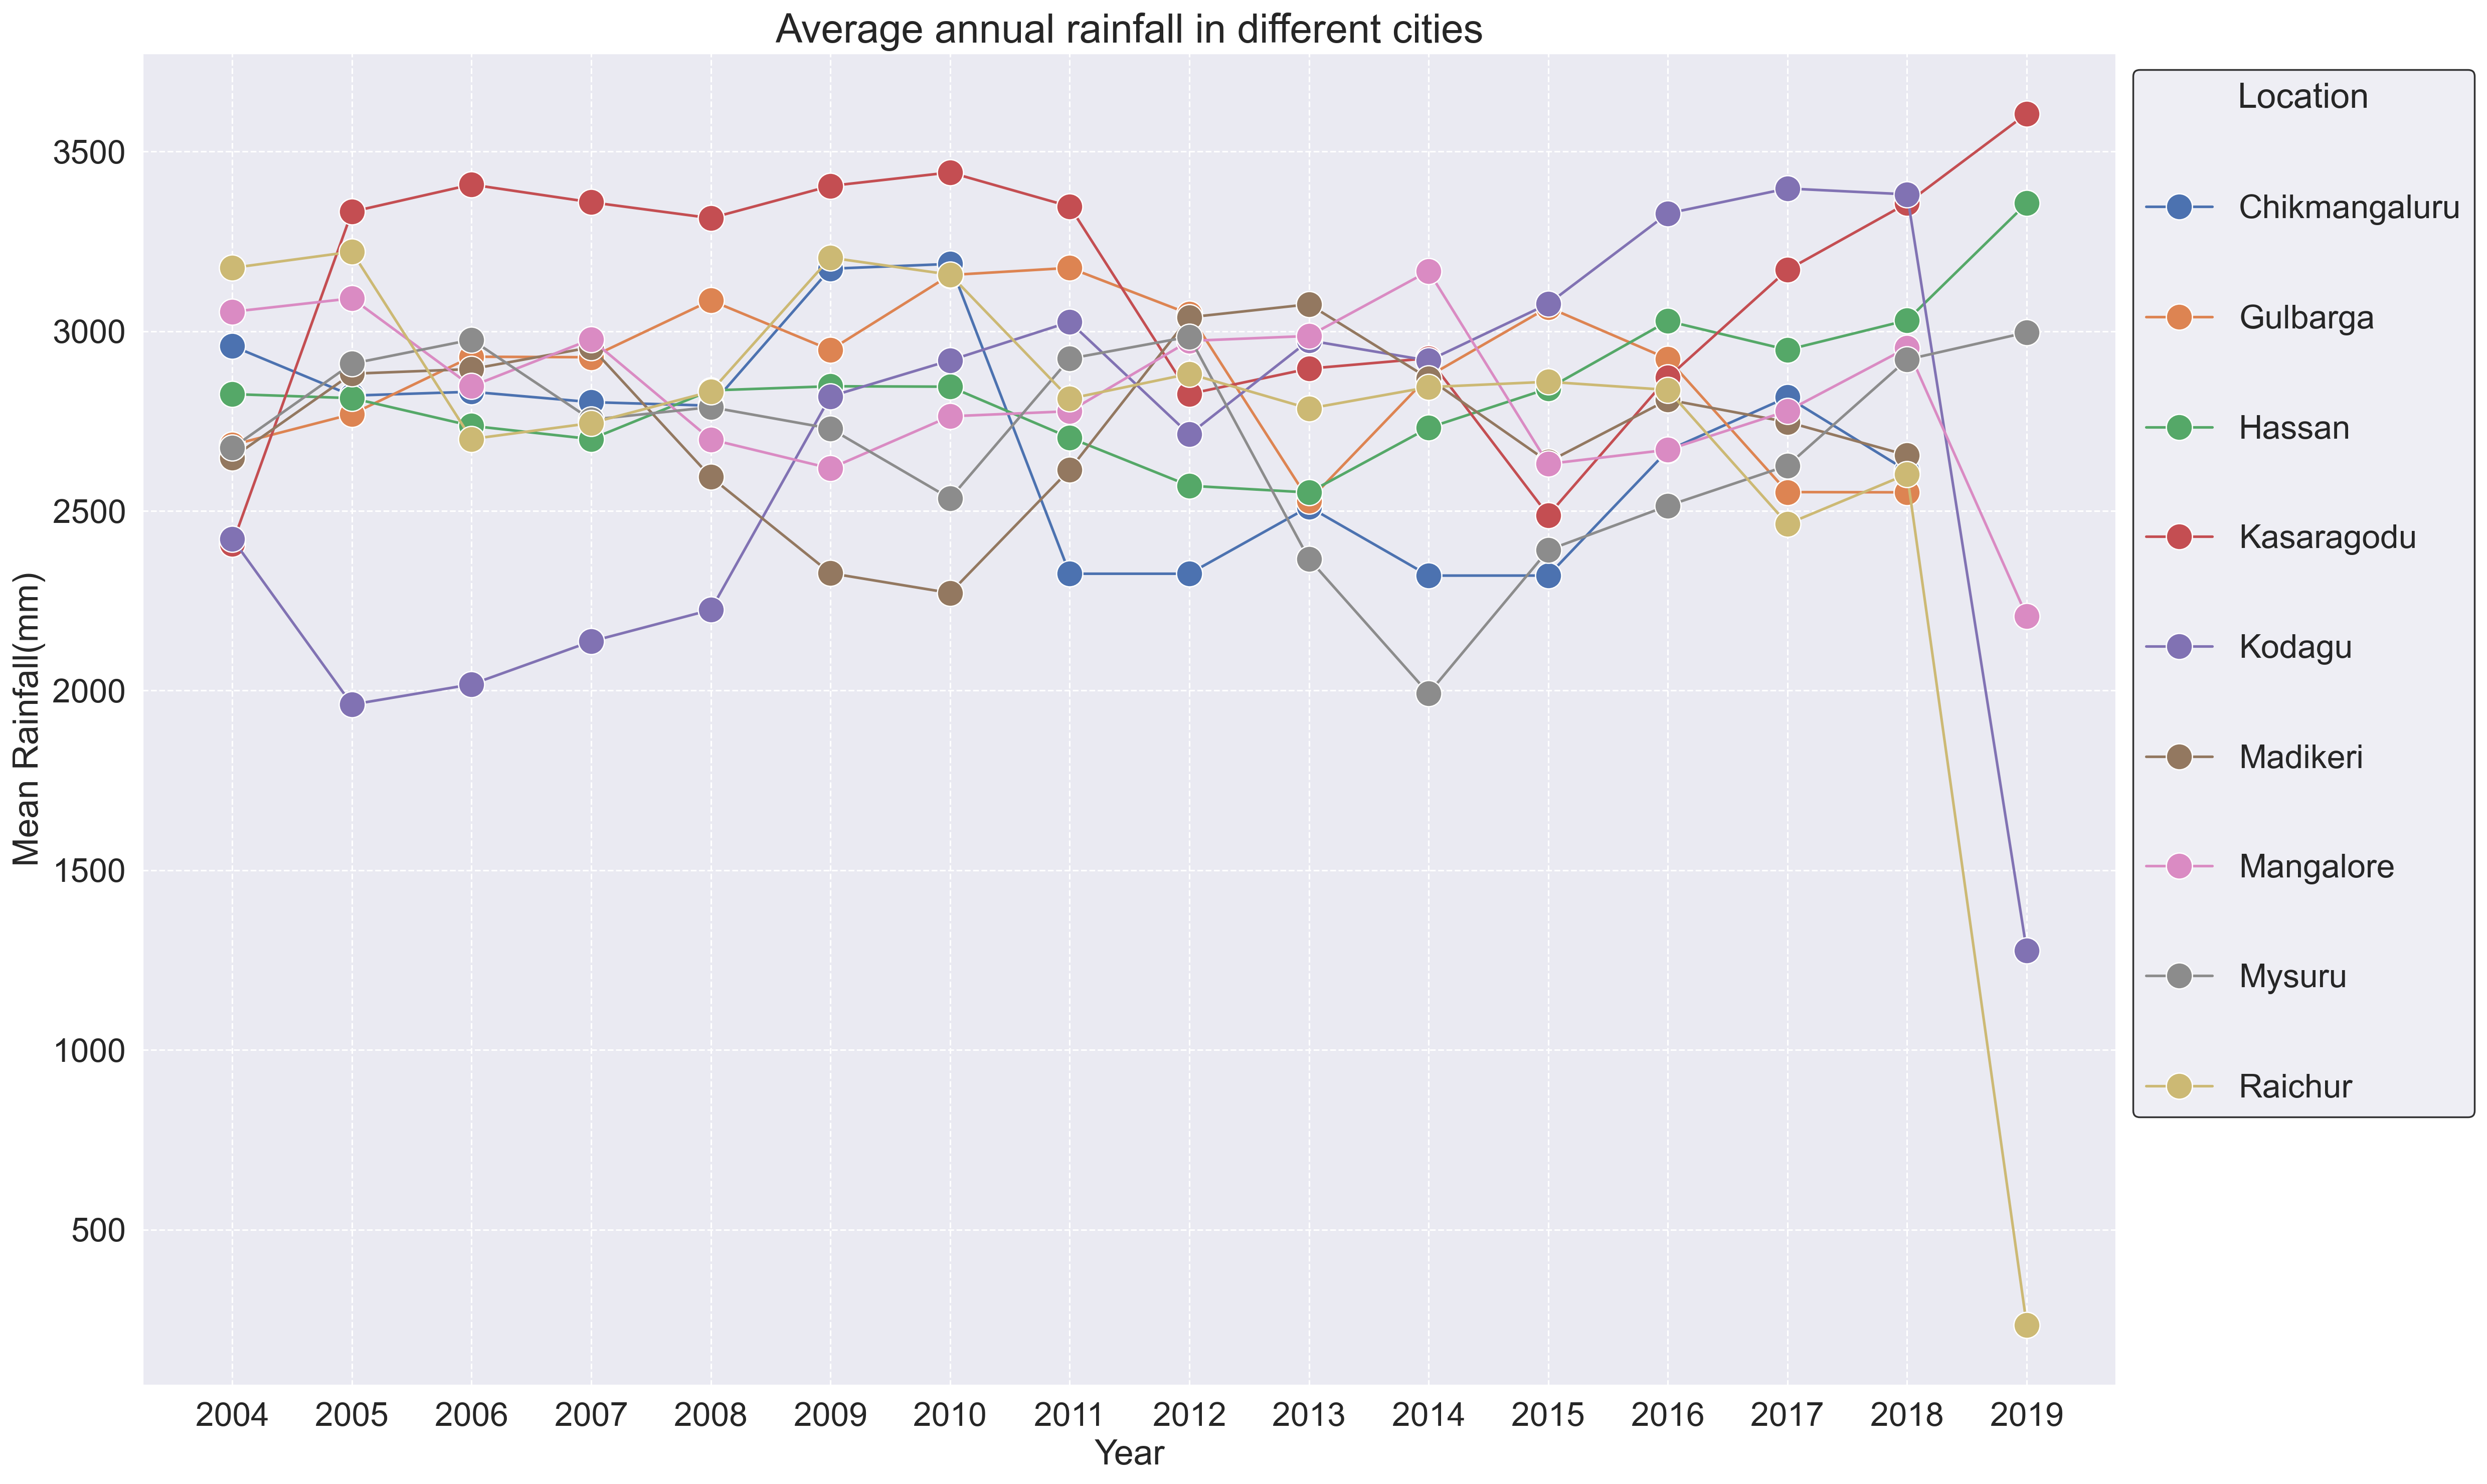

In [71]:
mean_rainfall = df.groupby(["Year", "Location"])["Rainfall"].mean().reset_index()


plt.rcParams["figure.figsize"] = (20, 12)   
plt.rcParams["figure.dpi"] = 250 
sns.lineplot(
    data=mean_rainfall,
    x="Year",
    y="Rainfall",
    hue="Location",
    marker="o",
    markersize=15,
)

plt.title("Average annual rainfall in different cities", fontsize=23)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Mean Rainfall(mm)", fontsize=20)
plt.legend(
    title="Location",
    title_fontsize=20,
    fontsize=19,
    edgecolor="black",
    bbox_to_anchor=(1, 1),
    labelspacing=2.4,
)
plt.tick_params(axis="both", labelsize=19)
plt.grid(True, linewidth=0.9, linestyle="--")
plt.xticks(range(2004, 2020, 1))
plt.tight_layout()
plt.show()

<font face="zar"  size=4>Chart Analysis:<br>
Overall trend over time<br>
Slight increase:<br>'Chikmangalur' and 'Kodagu' cities generally show a slight upward trend from 2004 to 2018.<br>
Relative stability:<br>'Kasaragodu' has maintained high and almost constant rainfall (3200–3500 mm).<br>
Sudden decrease in 2019:<br>
In 2019, almost all cities except 'Kasaragodu' and 'Hassan' show a temporary decrease in rainfall, probably due to a regional drought.<br><br>
Kasaragodu' city has seen a jump from 2400(mm) to 3300(mm), which means there are severe climate changes.<br><br>
'Raichur' city saw a sharp drop from 2018 to 2019, meaning there was probably a drought in the area.

## delete the missing value 'temperature'

In [72]:
df.drop(df[df["Temperature"] >50].index, inplace=True)

## group by location and see mean temp

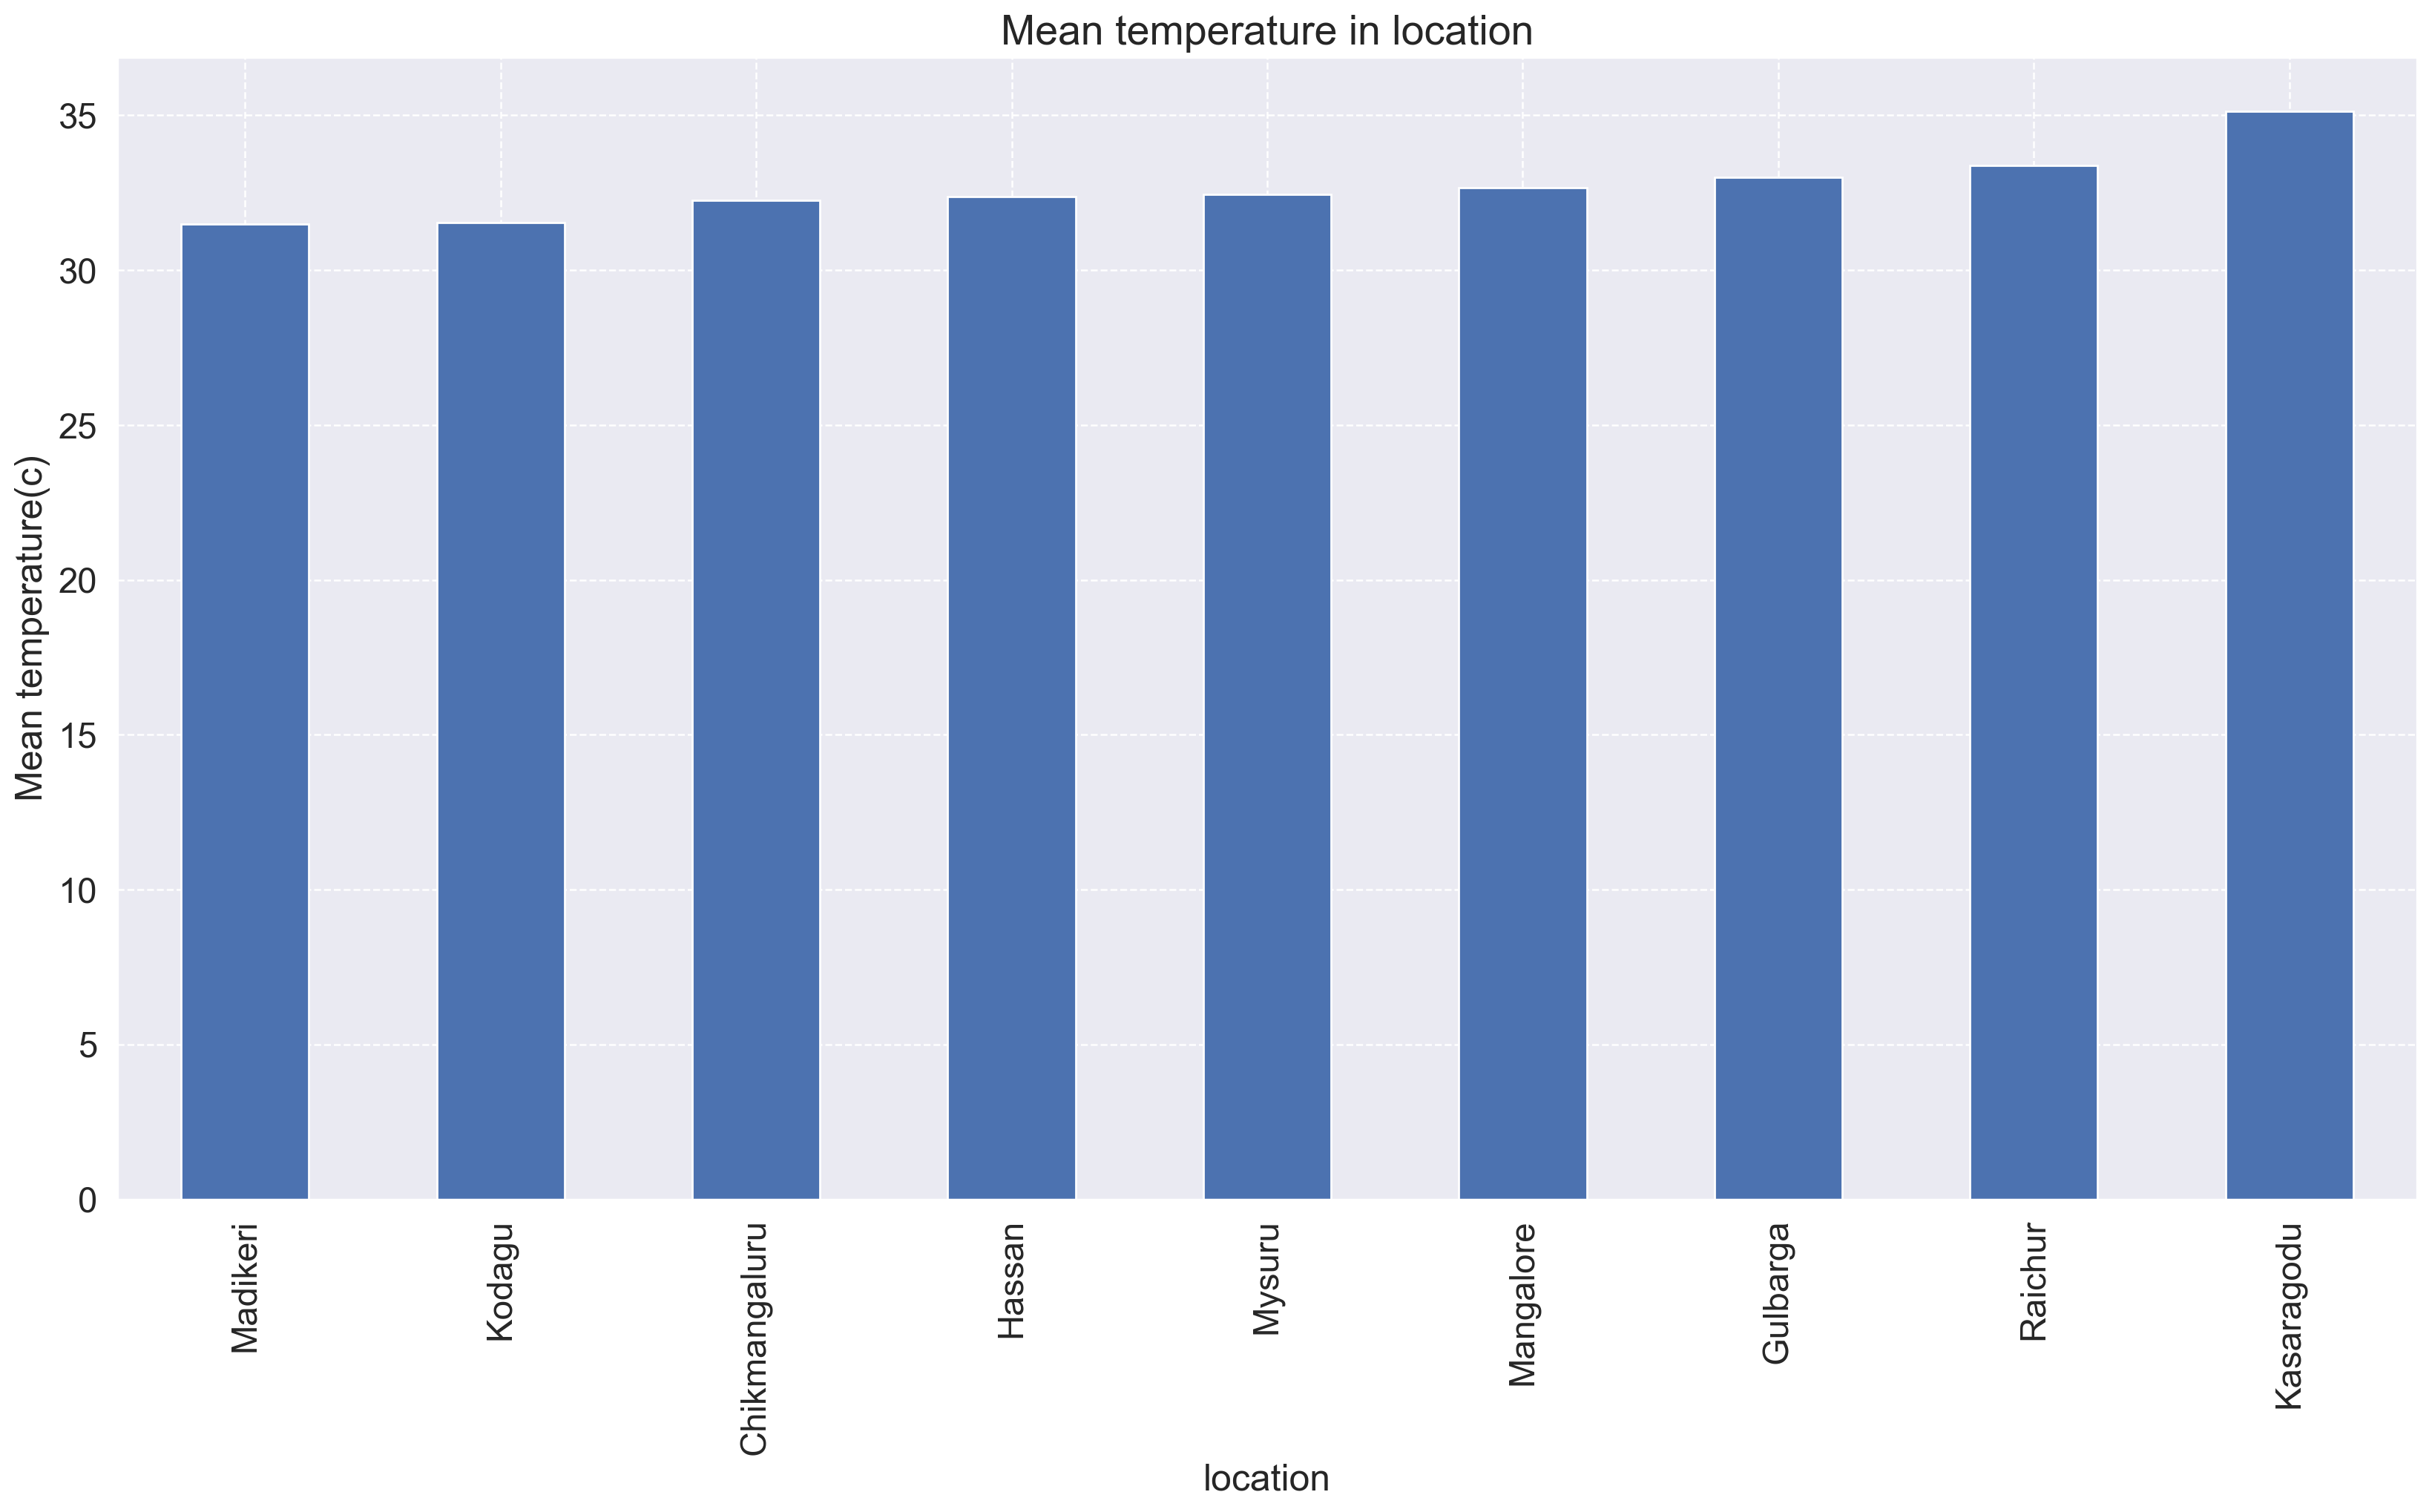

In [73]:
mean_temp_loc = df.groupby(["Location"])["Temperature"].mean().sort_values()
plt.figure(figsize=(20, 10), dpi=200)
mean_temp_loc.plot(kind="bar")
plt.title("Mean temperature in location", fontsize=20)
plt.xlabel("location", fontsize=18)
plt.ylabel("Mean temperature(c)", fontsize=18)
plt.tick_params(axis="both", labelsize=17)
plt.grid(True, linestyle="--", linewidth=0.9)
plt.show()

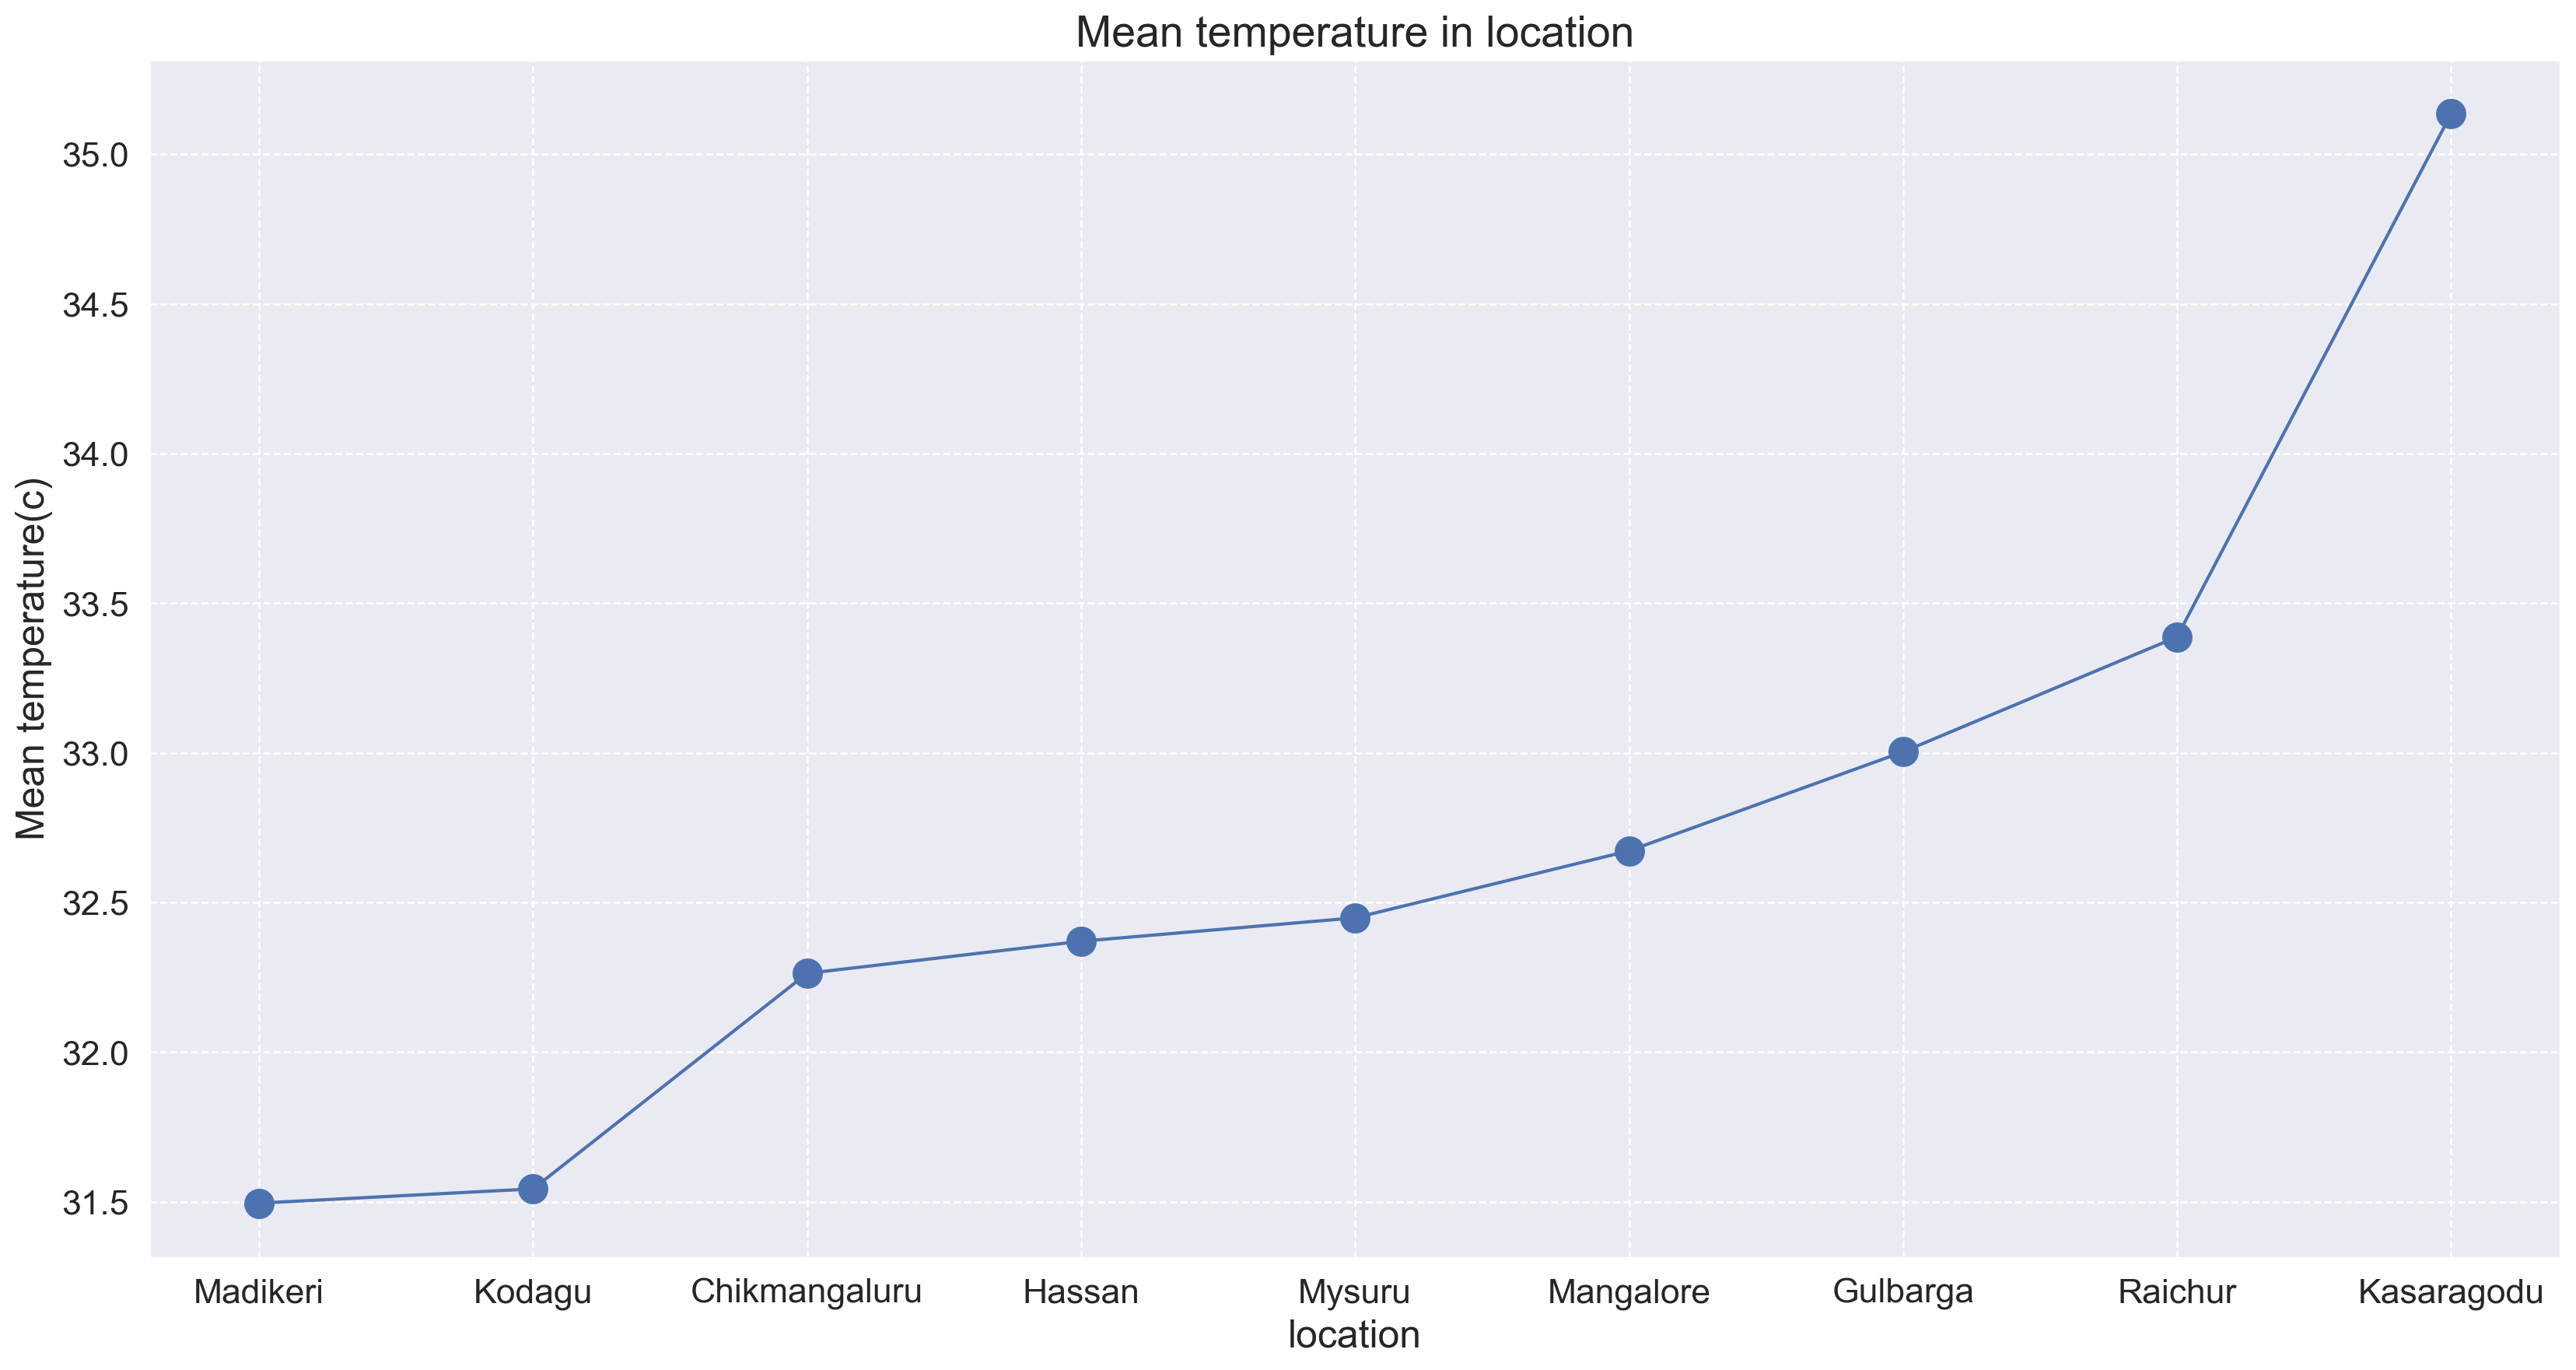

In [74]:
plt.figure(figsize=(20, 10), dpi=200)
plt.plot(mean_temp_loc.index, mean_temp_loc, marker='o', markersize=13)
plt.title("Mean temperature in location", fontsize=20)
plt.xlabel("location", fontsize=18)
plt.ylabel("Mean temperature(c)", fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.grid(True, linestyle="--", linewidth=0.9)
plt.show()

<font size=4>Chart Analysis:<font>
<br>
The average temperature of 'Kodagu' city is lower than other cities<br>
The average temperature of 'Kasaragodu' city is higher<br>
So 'Kodagu' city is cooler than other cities<br>

## Season_Irrigation

In [75]:
Season_Irrigation = df.groupby(["Season", "Irrigation"]).size().unstack(fill_value=0)

In [76]:
Season_Irrigation

Irrigation  Basin  Drip  Spray
Season                        
Kharif        100   184    160
Rabi          463   531    370
Zaid          152   203    215

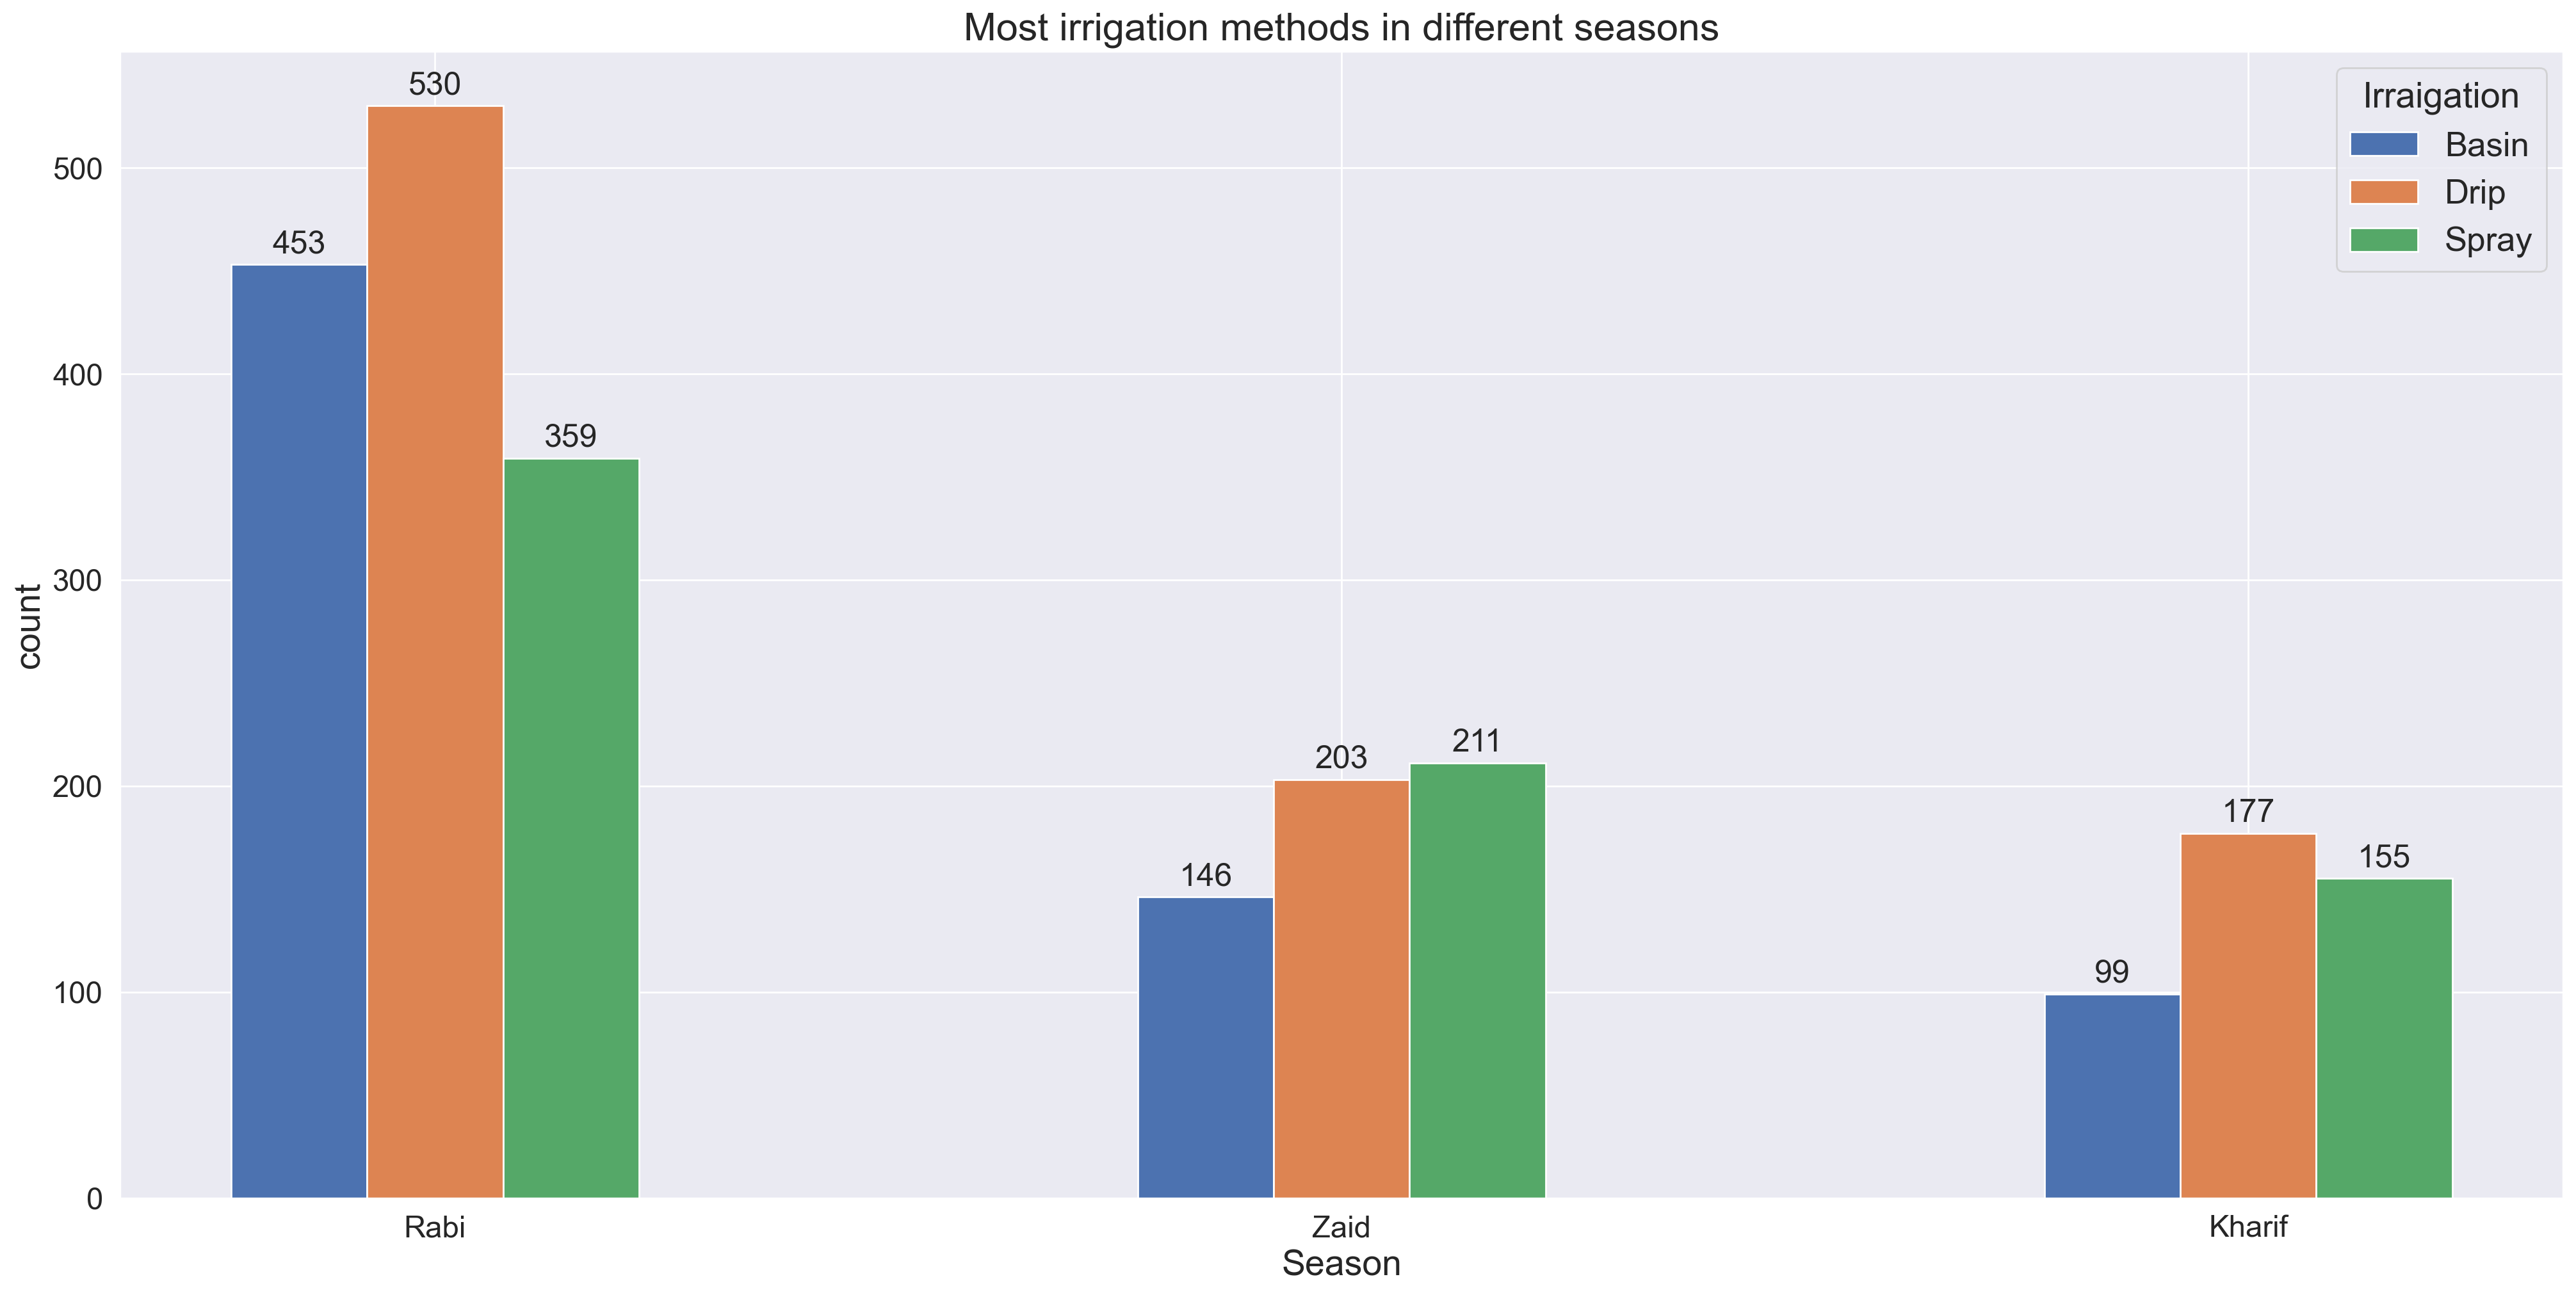

In [77]:
season = ("Rabi", "Zaid", "Kharif")
irraigation = {
    "Basin": (453, 146, 99),
    "Drip": (530, 203, 177),
    "Spray": (359, 211, 155),
}
x = np.arange(len(season))
width = 0.15
multiplier = 0
fig, ax = plt.subplots(figsize=(20, 10), dpi=200, layout="constrained")
for attribute, measurement in irraigation.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=18)
    multiplier += 1
ax.set_title("Most irrigation methods in different seasons", fontsize=22)
ax.set_xlabel("Season", fontsize=20)
ax.set_ylabel("count", fontsize=20)
ax.set_xticks(x + width, season)
ax.legend(title="Irraigation", loc="best", fontsize=19, title_fontsize=20)
ax.tick_params(axis="both", labelsize=17)
plt.show()

<font size=3 face="time new roman Italic">
In the Rabi, the most commonly used type of irrigation was drip and basin irrigation.<br>
In the Zaid, the most commonly used type of irrigation was Spary and drip irrigation.<br>
In the kharif, the most commonly used type of irrigation was drip and spary irrigation.

## Season_Crops

In [78]:
Season_Crops = df.groupby(["Season", "Crops"]).size().unstack(fill_value=0)

In [79]:
Season_Crops

Crops   Arecanut  Blackgram  Cardamum  Cashew  Cocoa  Coconut  Coffee  Cotton  \
Season                                                                          
Kharif        15         45         0      34      0      189       0       9   
Rabi          75         33        75      47     30      653      68       8   
Zaid          21         30        45      14     12      267      41       0   

Crops   Ginger  Groundnut  Paddy  Pepper  Tea  
Season                                         
Kharif      30         41     45      14   22  
Rabi       128         45     58      75   69  
Zaid        30         30     28      31   21

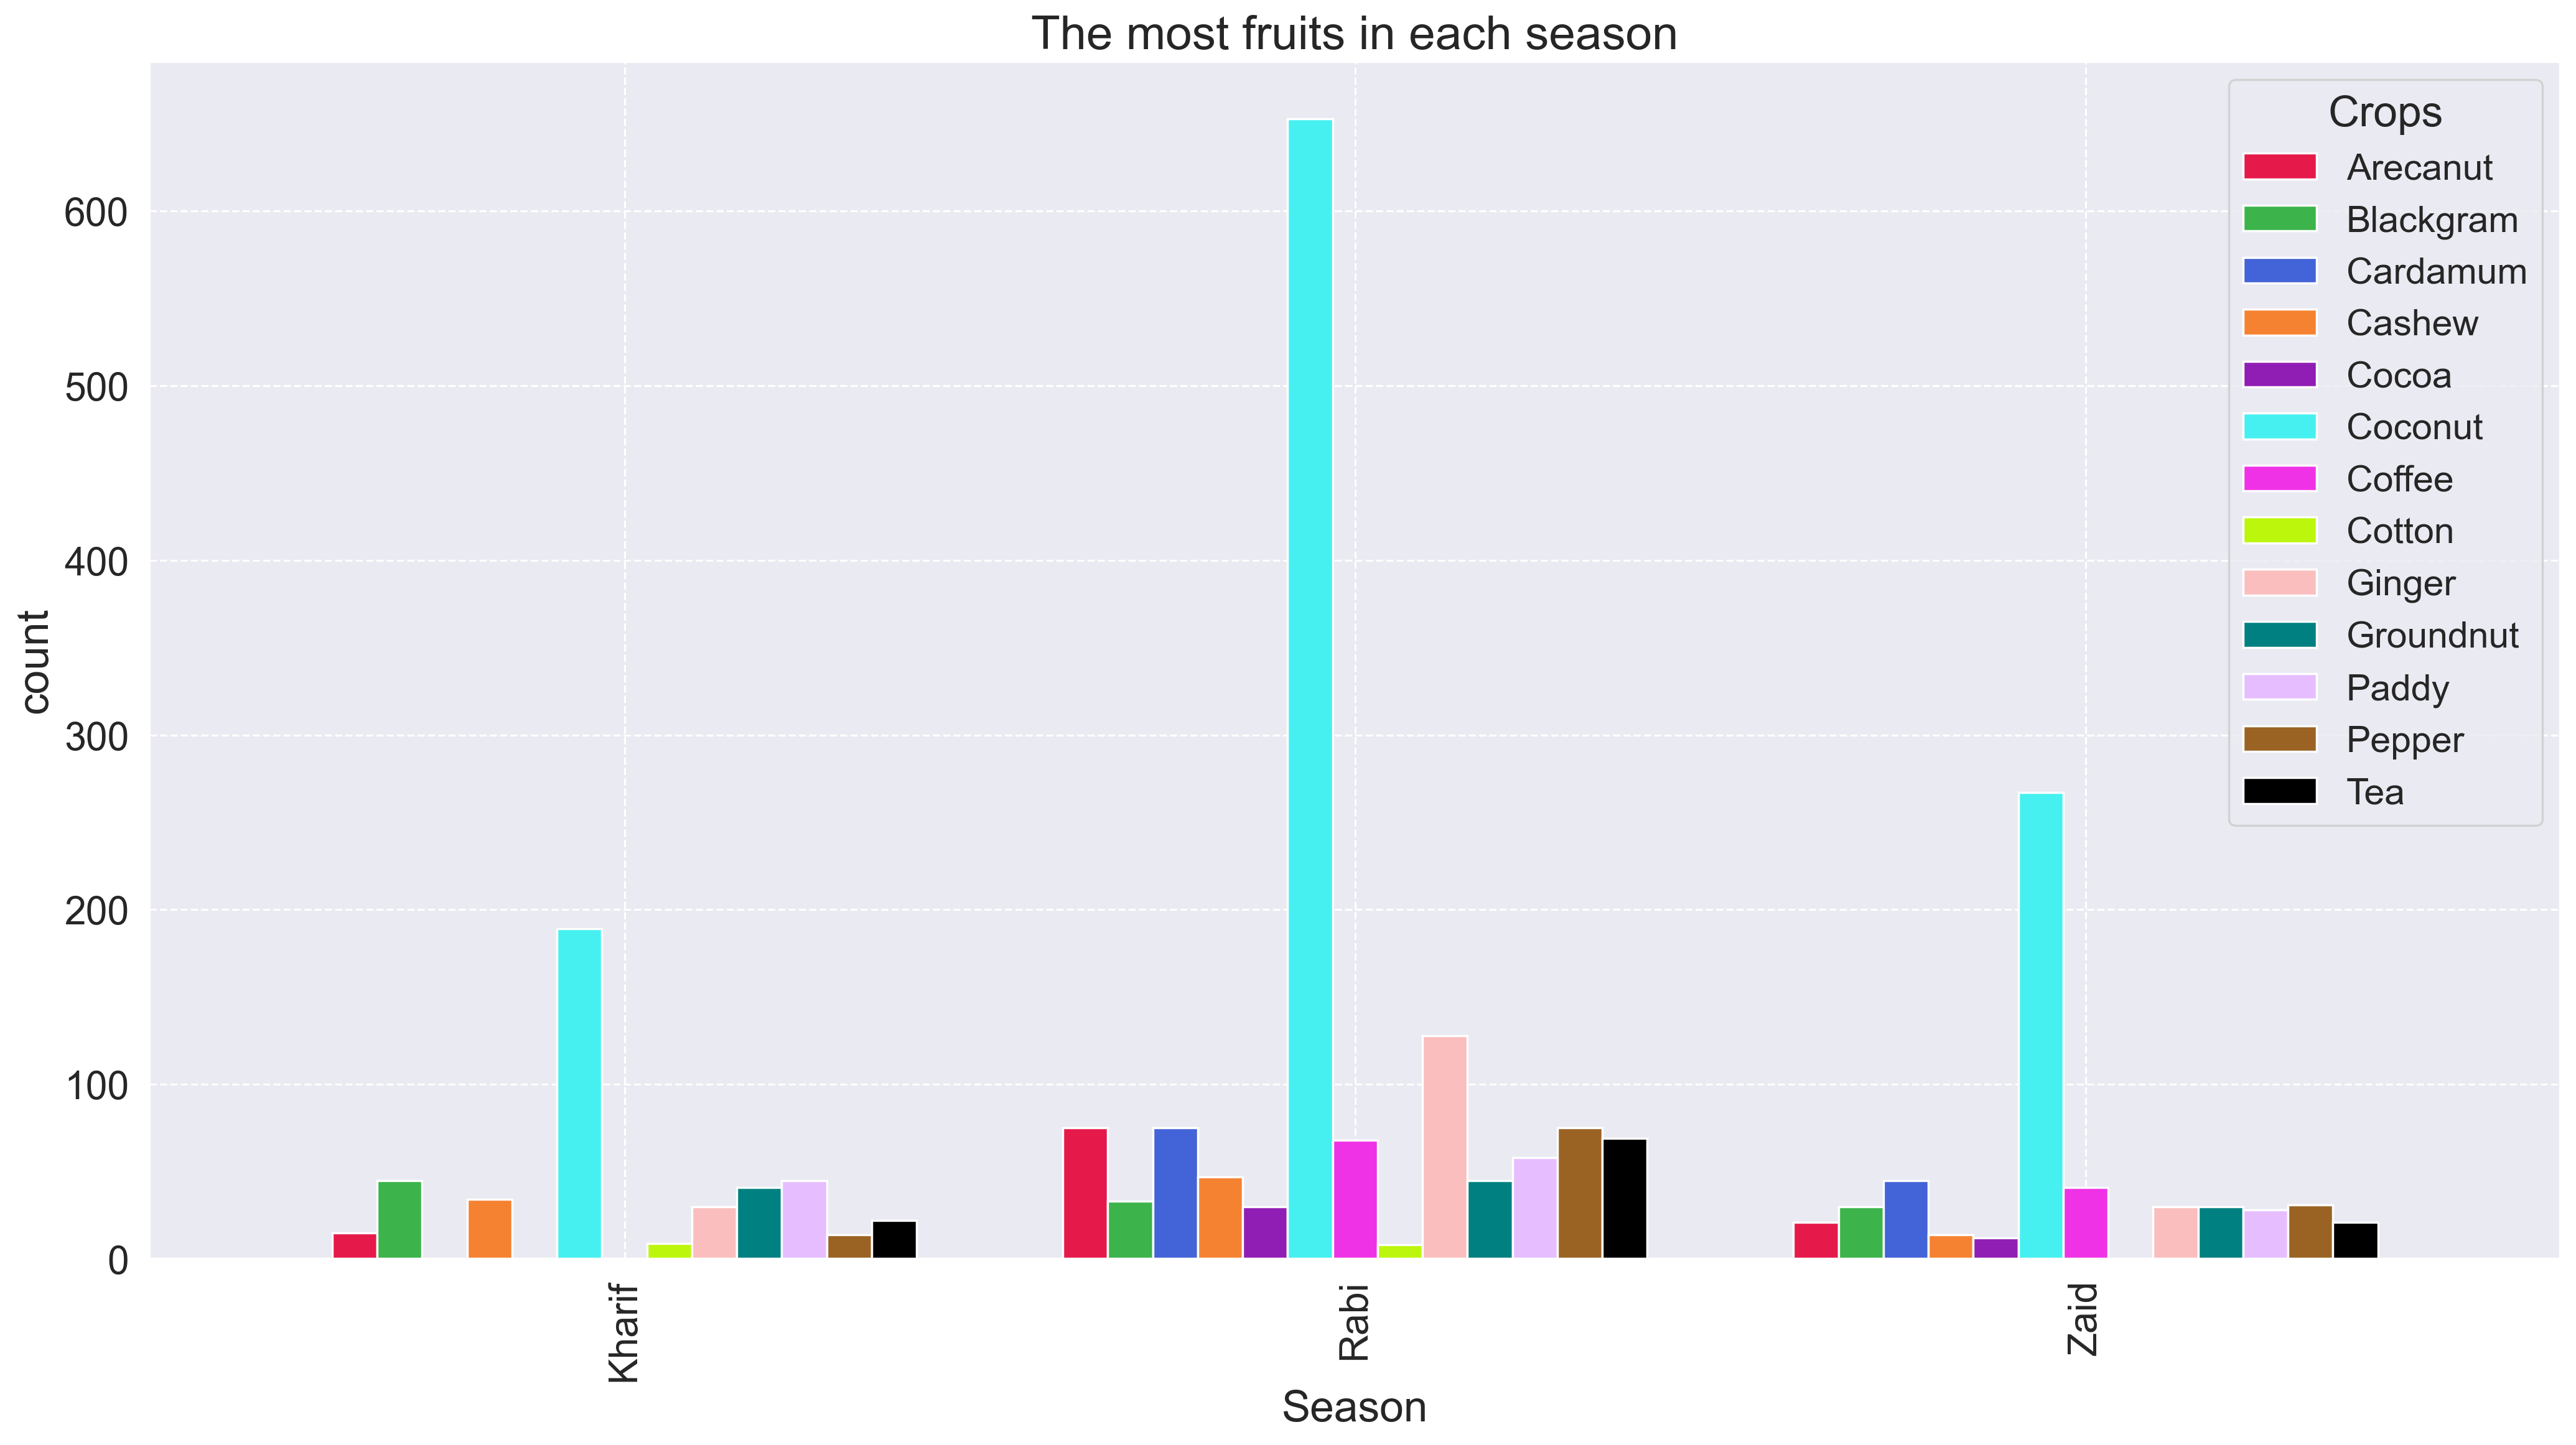

In [80]:
colors = [
    '#e6194b', 
    '#3cb44b',  
    '#4363d8',  
    '#f58231',  
    '#911eb4',  
    '#46f0f0',  
    '#f032e6',  
    '#bcf60c',  
    '#fabebe',  
    '#008080',  
    '#e6beff',  
    '#9a6324', 
    "black"]


Season_Crops.plot(
    kind="bar", figsize=(20, 10), grid=True, fontsize=18, width=0.8, color=colors
)
plt.title("The most fruits in each season", fontsize=22)
plt.xlabel("Season", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.legend(title="Crops", fontsize=17, title_fontsize=20)
plt.grid(True, linestyle="--", linewidth=0.9)
plt.show()

<font face="time new roman" size=3>
Kharif, Rabi, and Zaid. Coconut is the most prominent crop in all seasons, with significantly higher counts compared to other crops. The Rabi season shows the highest diversity and quantity of crops, while Kharif and Zaid have relatively lower counts. This highlights the seasonal variation in crop cultivation practices.

## mean_price_location

In [81]:
mean_price_loc = df.groupby(["Location"])["price"].mean().sort_values()

In [82]:
mean_price_loc

Location
Madikeri         84173.240876
Kasaragodu       85416.975309
Chikmangaluru    85641.363905
Mangalore        85696.529231
Mysuru           86631.039409
Hassan           86716.296044
Gulbarga         86935.798319
Raichur          87037.080460
Kodagu           87334.006452
Name: price, dtype: float64

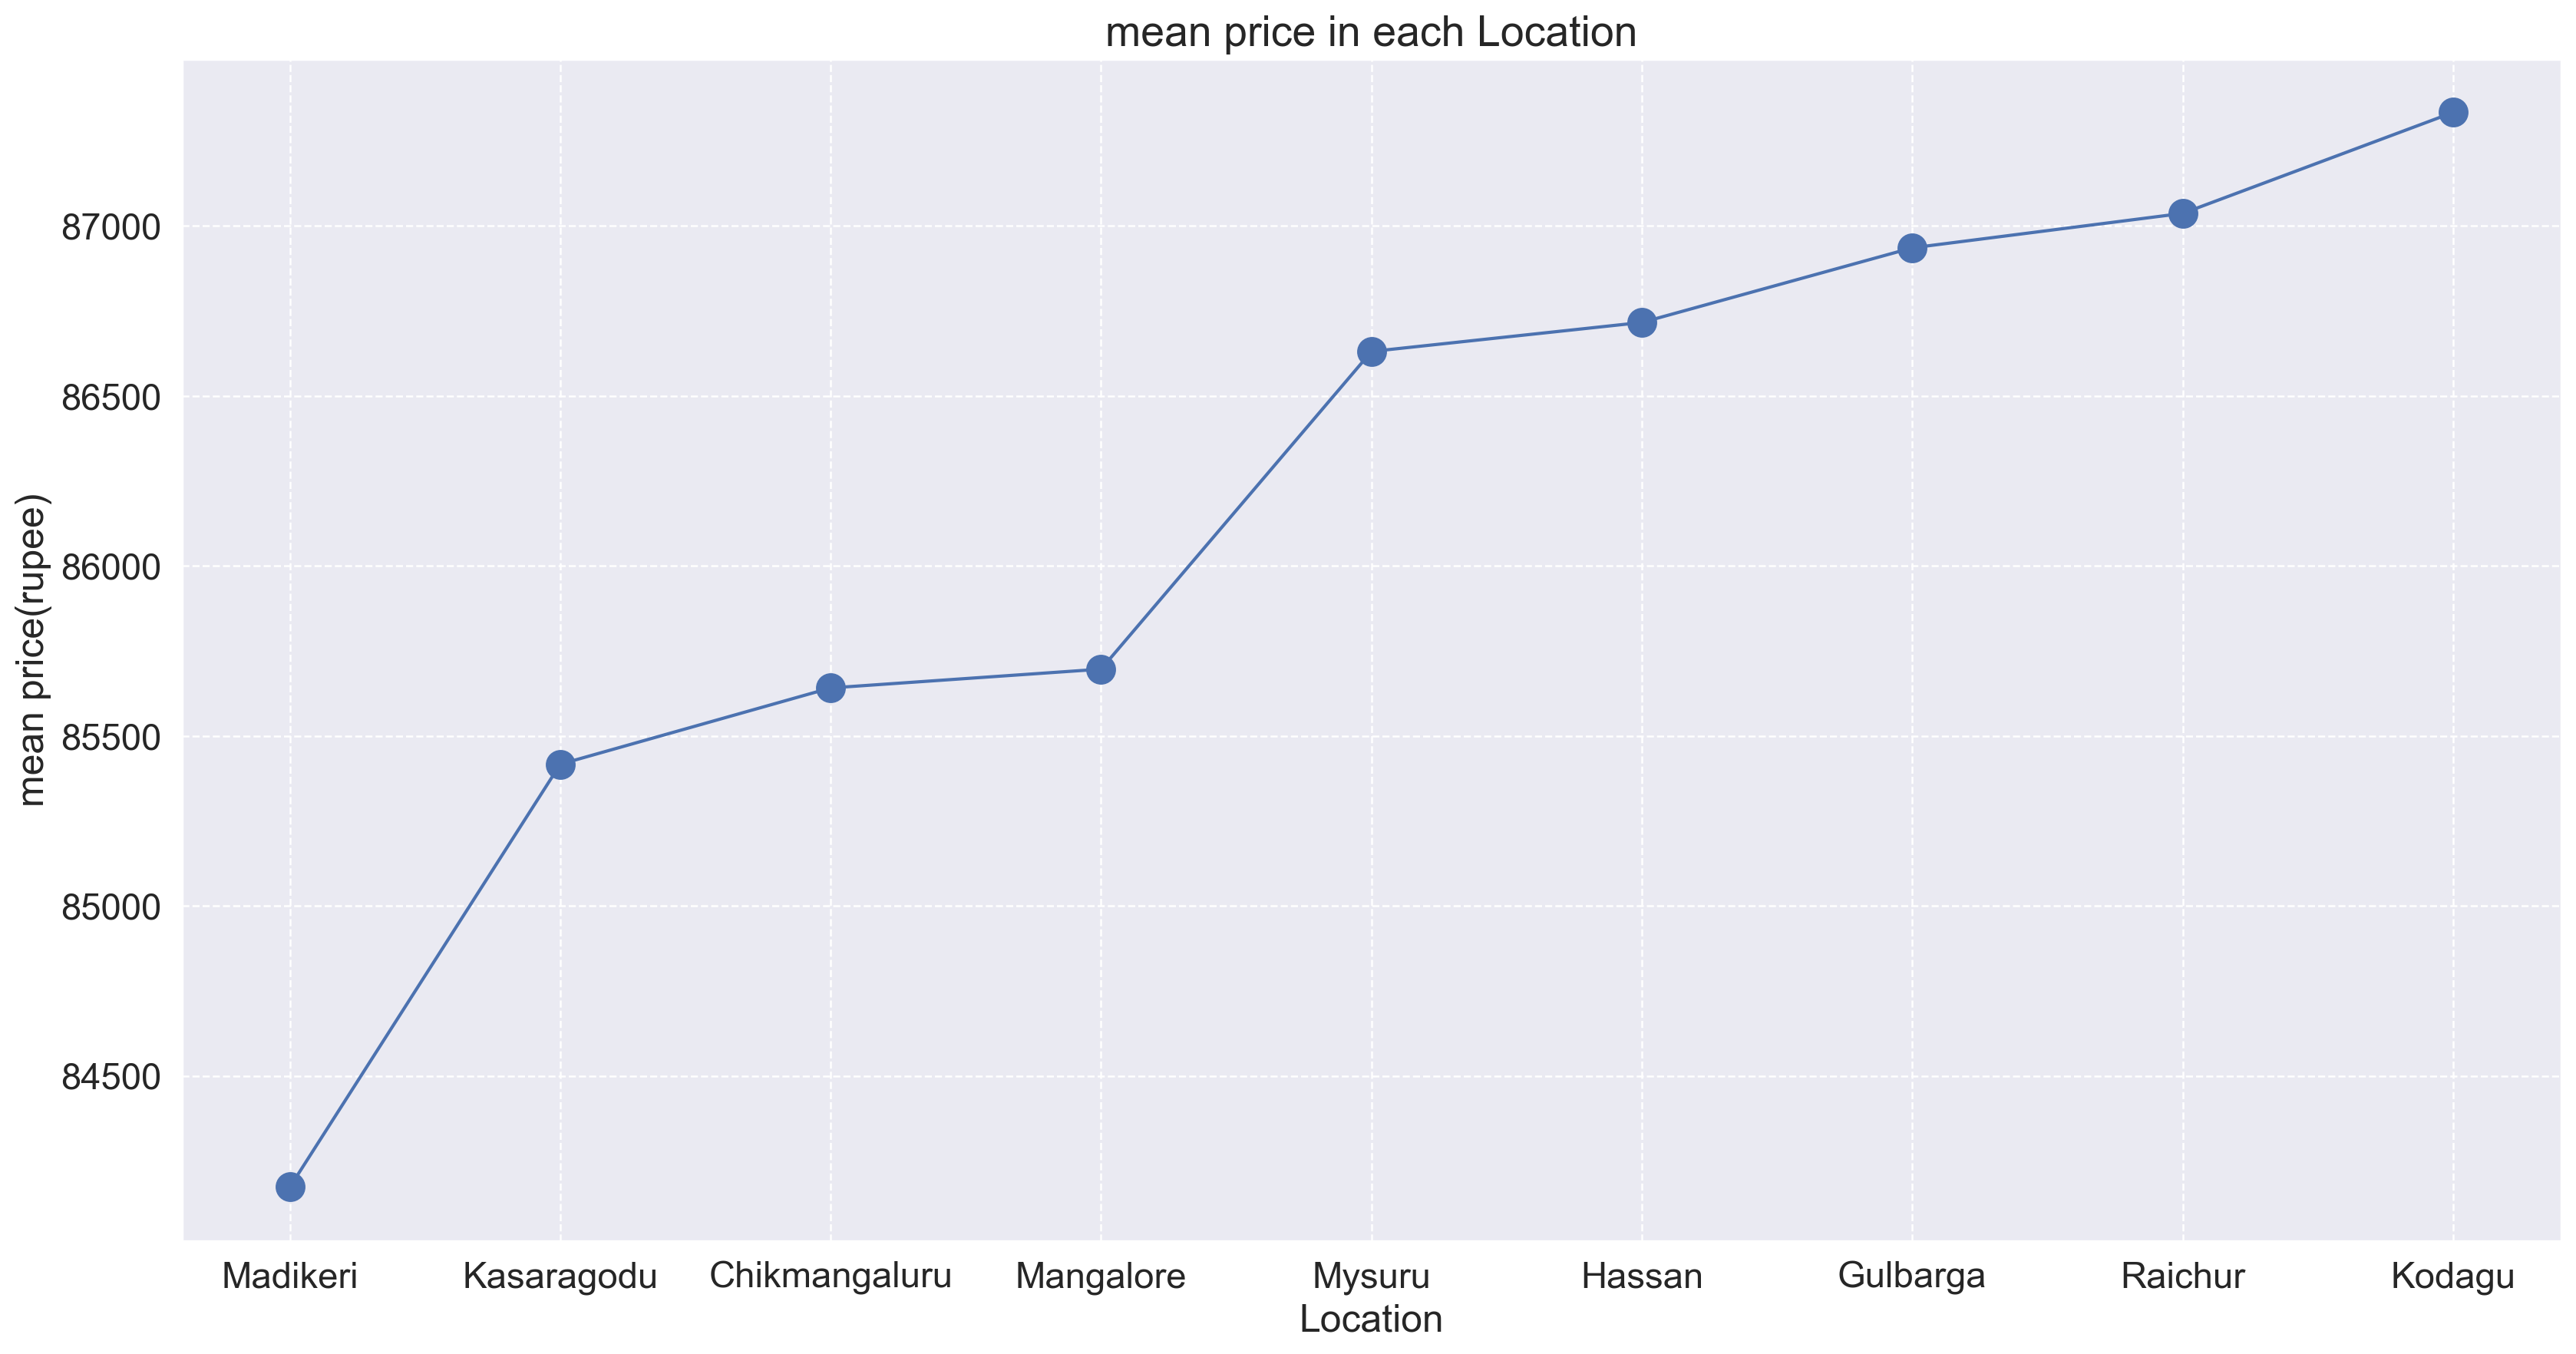

In [83]:
plt.figure(figsize=(20, 10), dpi=200)
mean_price_loc.plot(marker='o', markersize=13)
plt.title("mean price in each Location", fontsize=20)
plt.xlabel("Location", fontsize=18)
plt.ylabel("mean price(rupee)", fontsize=18)
plt.tick_params(axis="both", labelsize=17)
plt.grid(True, linestyle="--", linewidth=0.9)
plt.show()

<font face="zar" size=3>
Cities:<br>
Gulbarga, Kodagu, Mangalore, Mysuru, Hassan
have prices above 87 thousand.
It may depend on other factors such as soil type, cultivation method, and type of irrigation and crop.

## Soil type_price

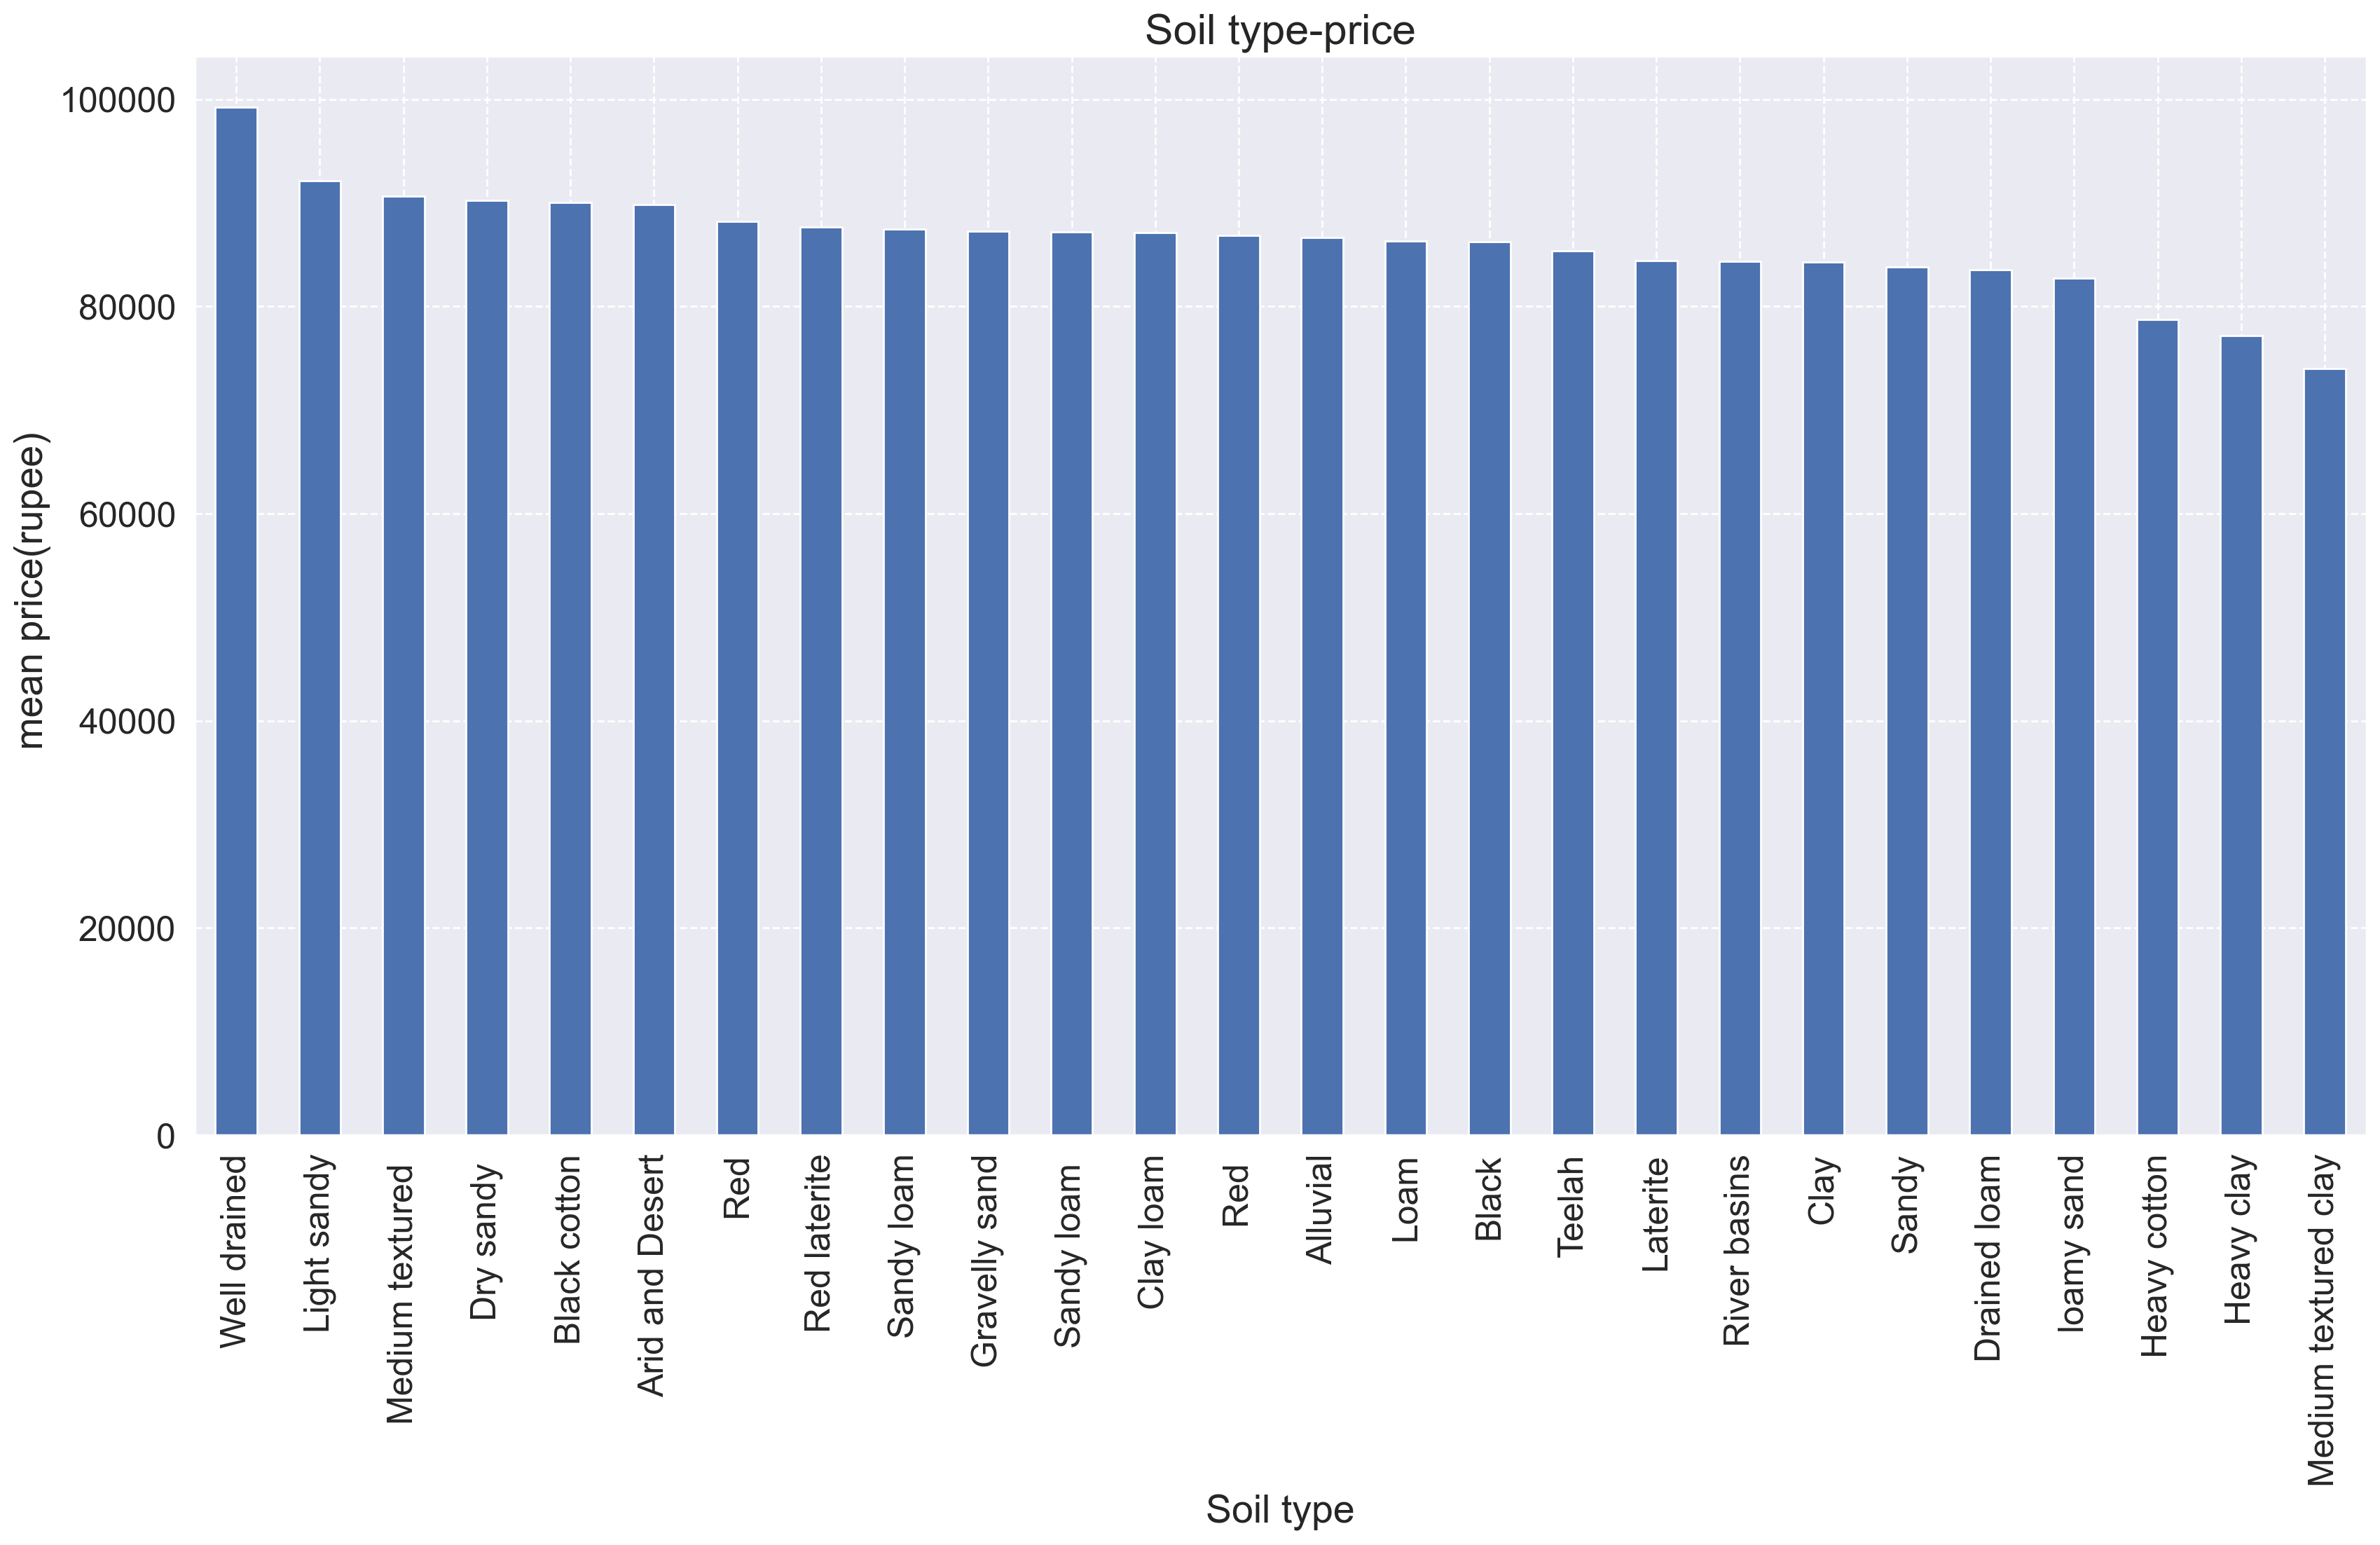

In [84]:
plt.figure(figsize=(20, 10), dpi=200)
ax = (df.groupby(["Soil type"])["price"].
      mean().
      sort_values(ascending=False).
      plot(kind="bar"))
plt.title("Soil type-price", fontsize=22)
plt.xlabel("Soil type", fontsize=20)
plt.ylabel(" mean price(rupee)", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
plt.grid(True, linestyle='--', linewidth=1)
plt.show()

<font face="B Nazanin Bold" size=3>
This chart represents the average price based on soil type.<br>
well Drained soils have the highest average price.<br>
Medium-textured soils show the lowest average price.
</font>

## Soil type_yeilds

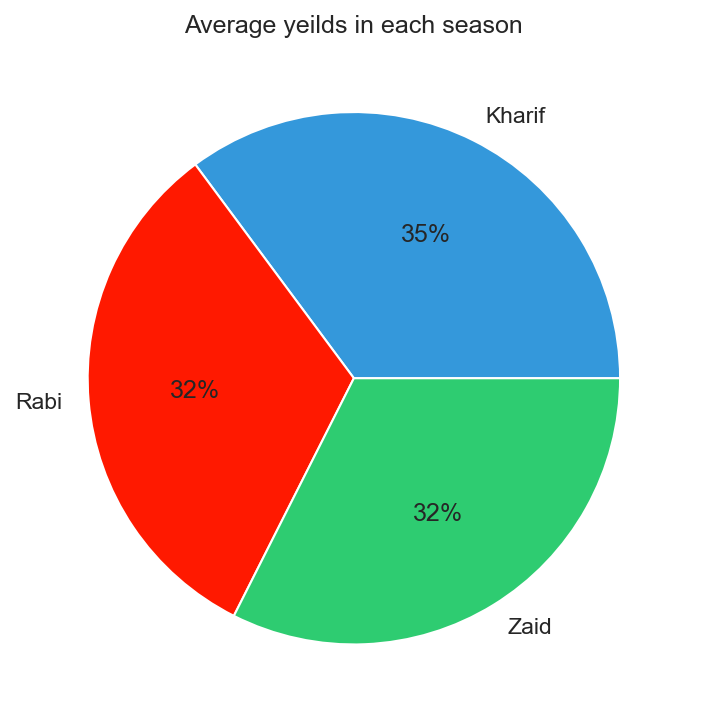

In [85]:
plt.figure(figsize=(7, 5), dpi=150)
df.groupby(["Season"])["yeilds"].mean().plot(
    kind="pie", autopct="%1.0f%%", colors=["#3498db", "#ff1900", "#2ecc71"]
)
plt.ylabel("")
plt.title("Average yeilds in each season")
plt.tight_layout()
plt.show()

Kharif season has the highest yield.

## Soil type_yeilds

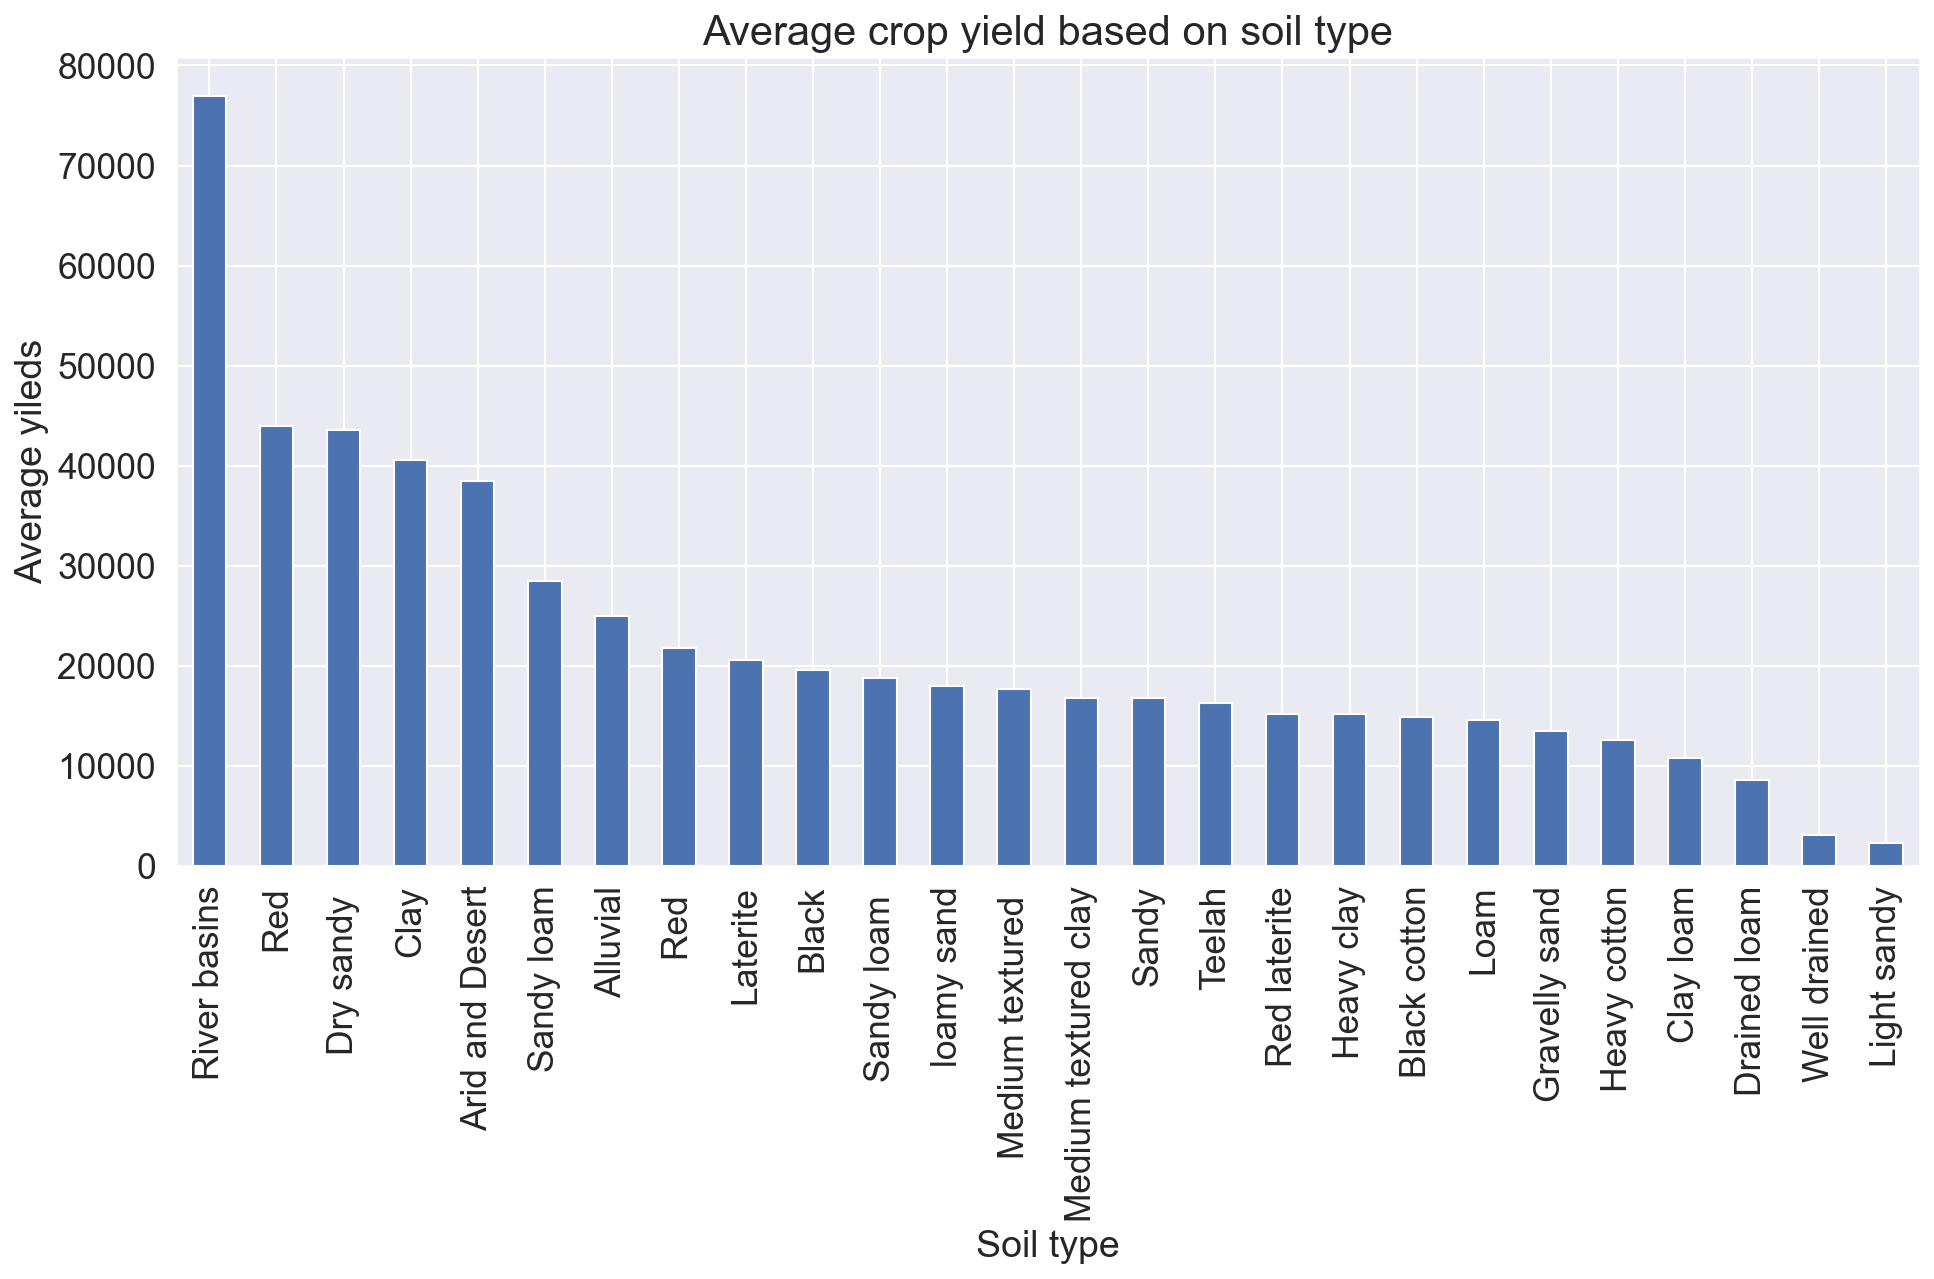

In [86]:
plt.figure(figsize=(15, 7), dpi=150)
df.groupby(["Soil type"])["yeilds"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average crop yield based on soil type", fontsize=20)
plt.xlabel("Soil type", fontsize=18)
plt.ylabel("Average yileds", fontsize=18)
plt.tick_params(axis="both", labelsize=17)
plt.show()

River basins soil has the highest crop yields

## Location_yeilds

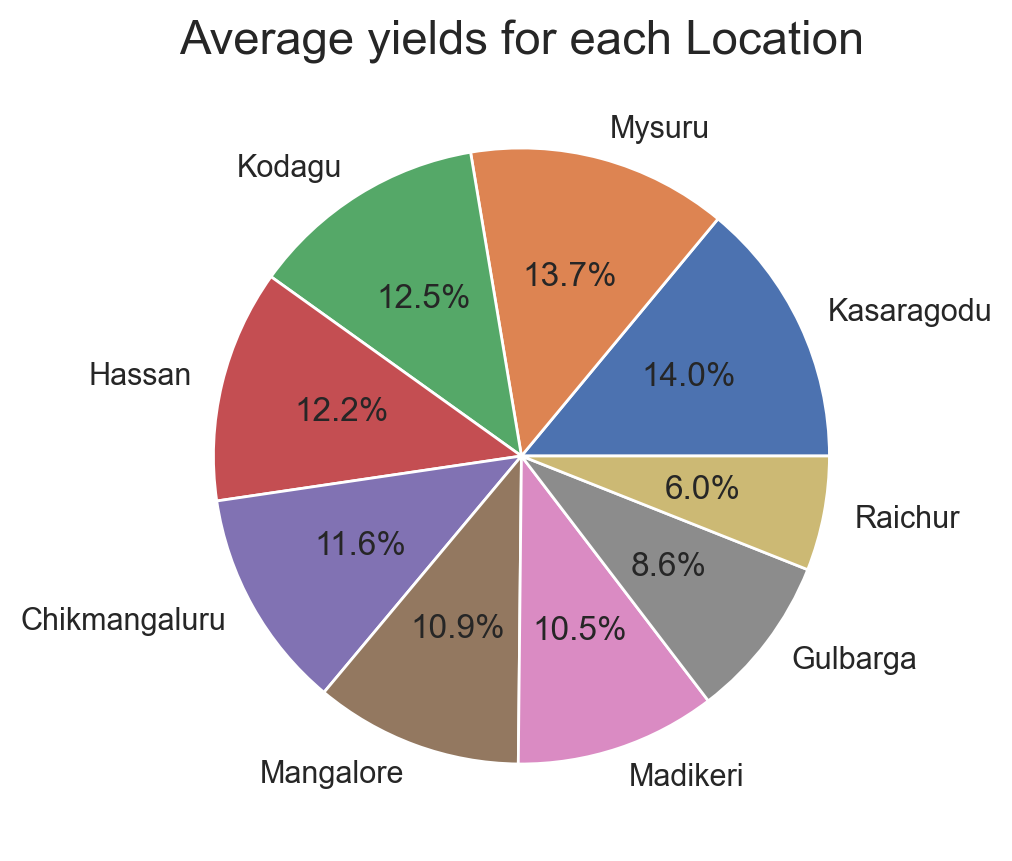

In [87]:
plt.figure(figsize=(10, 5), dpi=200)
df.groupby(["Location"])["yeilds"].mean().sort_values(ascending=False).plot(
    kind="pie", autopct="%1.1f%%"
)
plt.title("Average yields for each Location", fontsize=17)
plt.ylabel("")
plt.show()

Kasaragodu district has the highest yield

## Year-yeilds

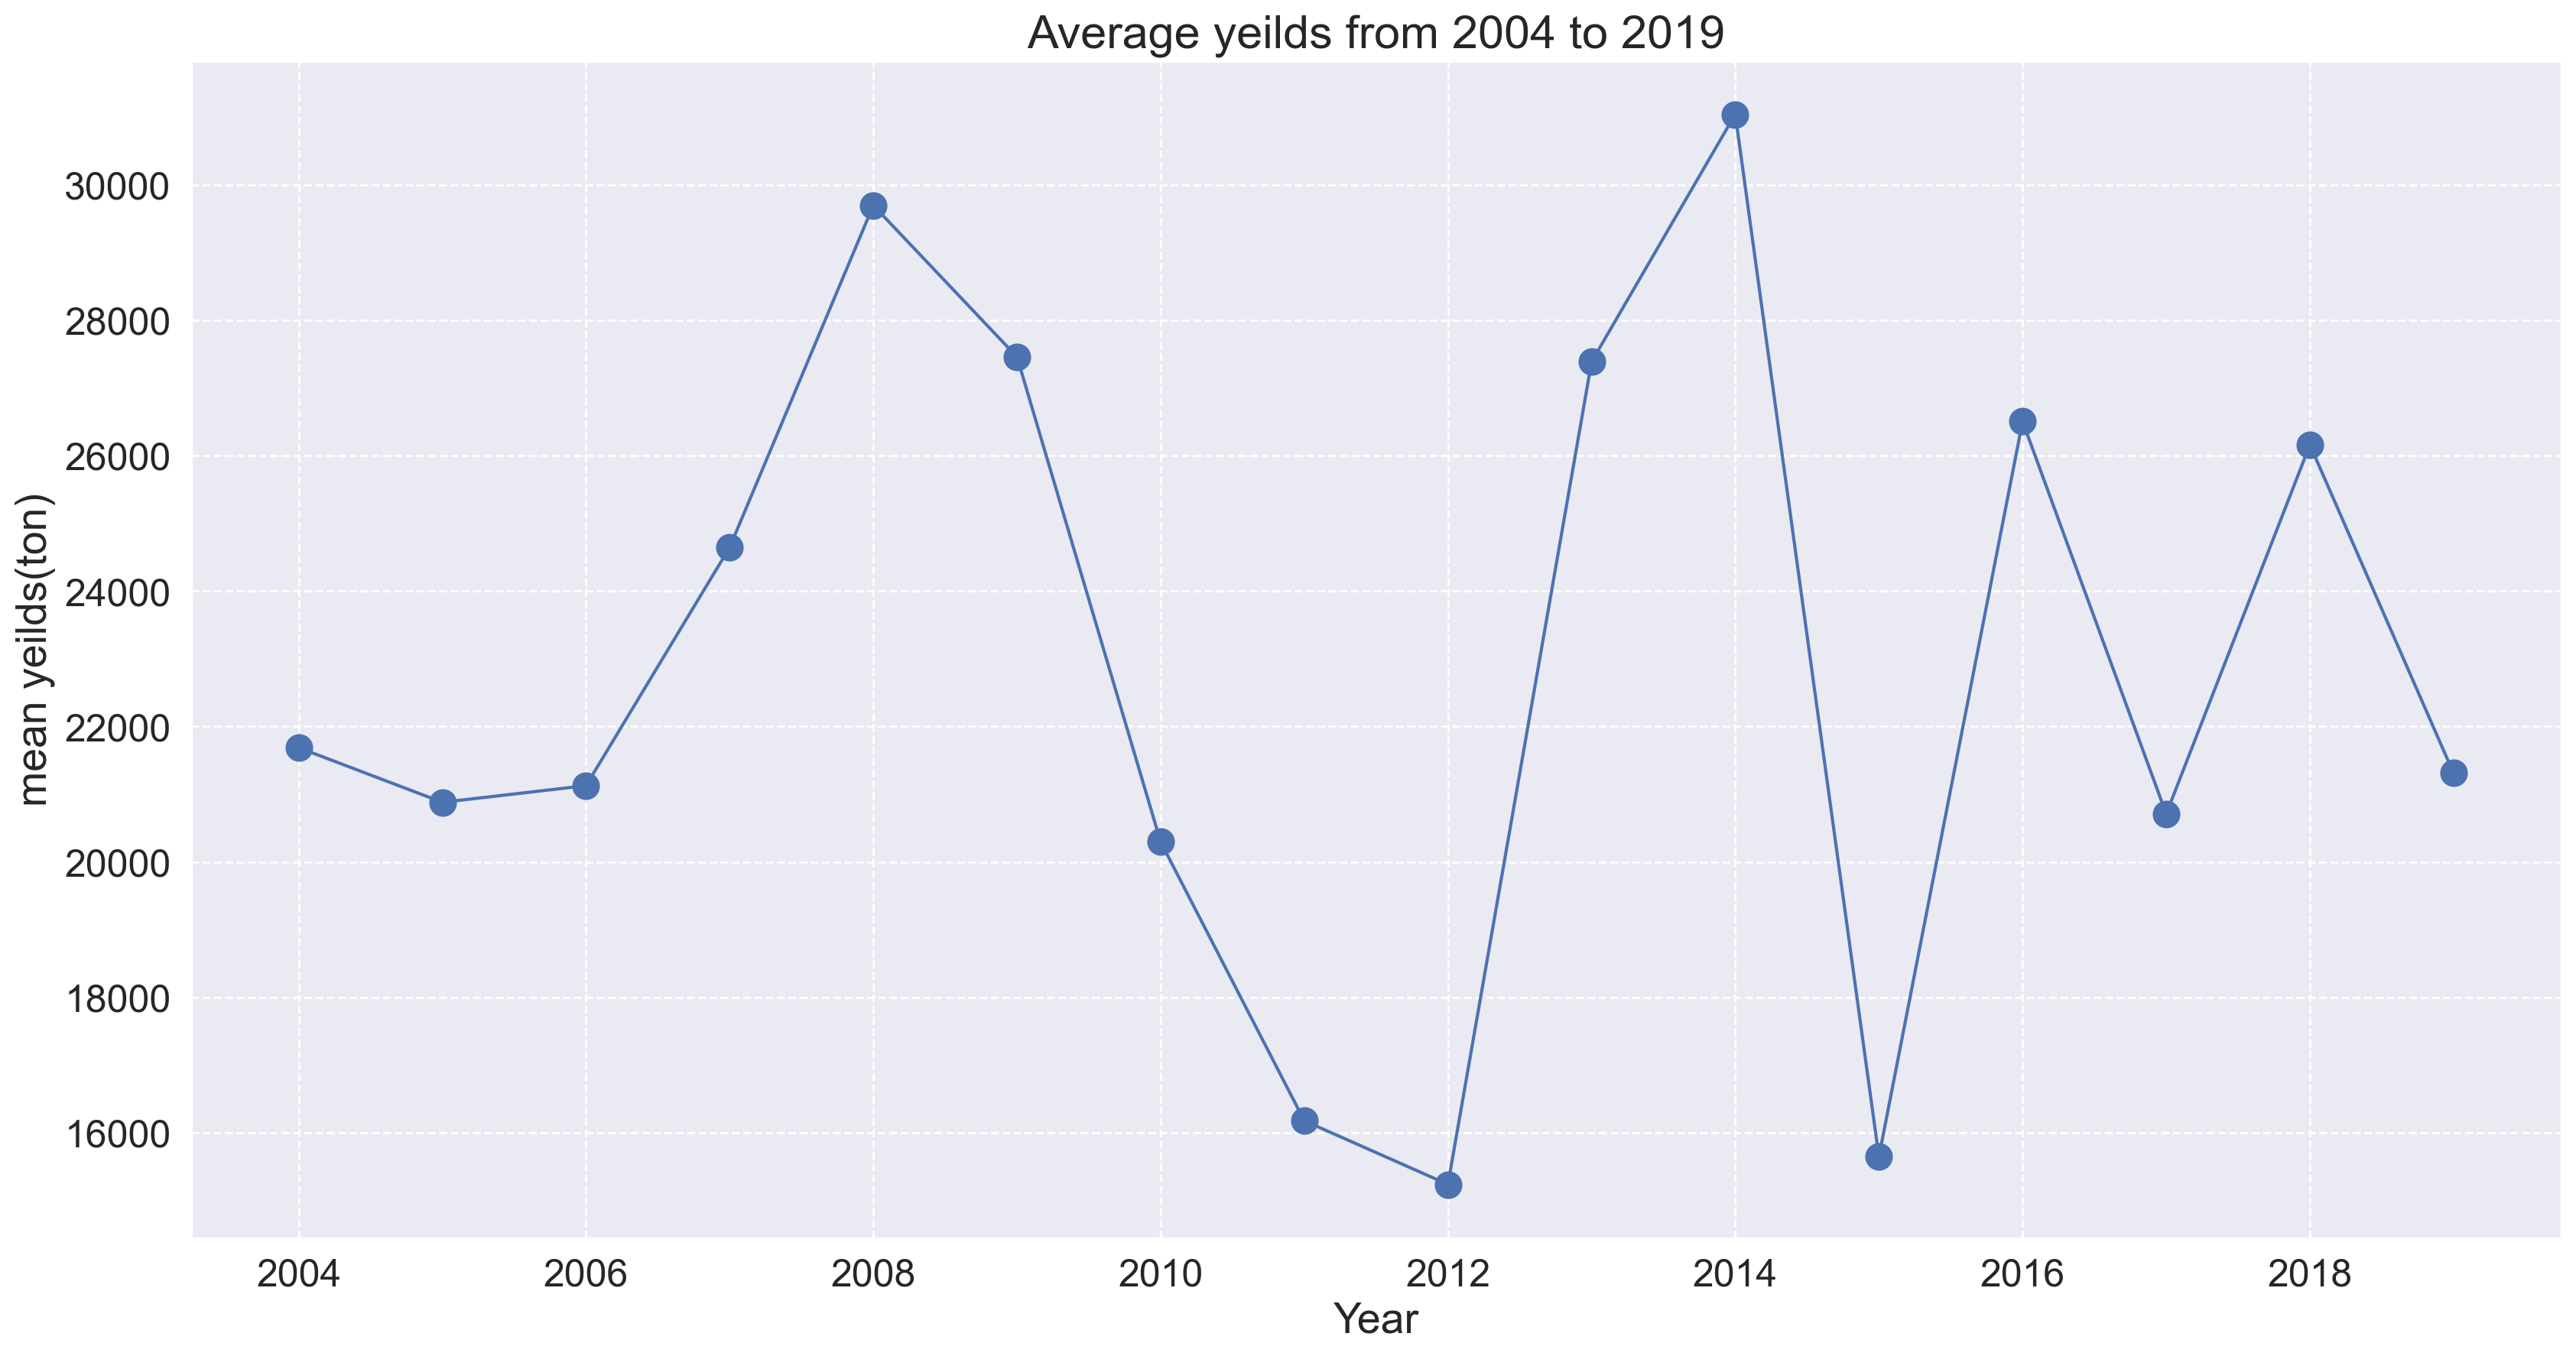

In [88]:
plt.figure(figsize=(20, 10), dpi=200)
df.groupby(["Year"])["yeilds"].mean().plot(marker="o", markersize=12)
plt.title("Average yeilds from 2004 to 2019", fontsize=22)
plt.xlabel("Year", fontsize=20)
plt.ylabel("mean yeilds(ton)", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
plt.grid(True, linestyle="--")
plt.show()

The years 2014 and 2008 had the highest returns.

The year 2012 had the lowest returns.

## Crops_price

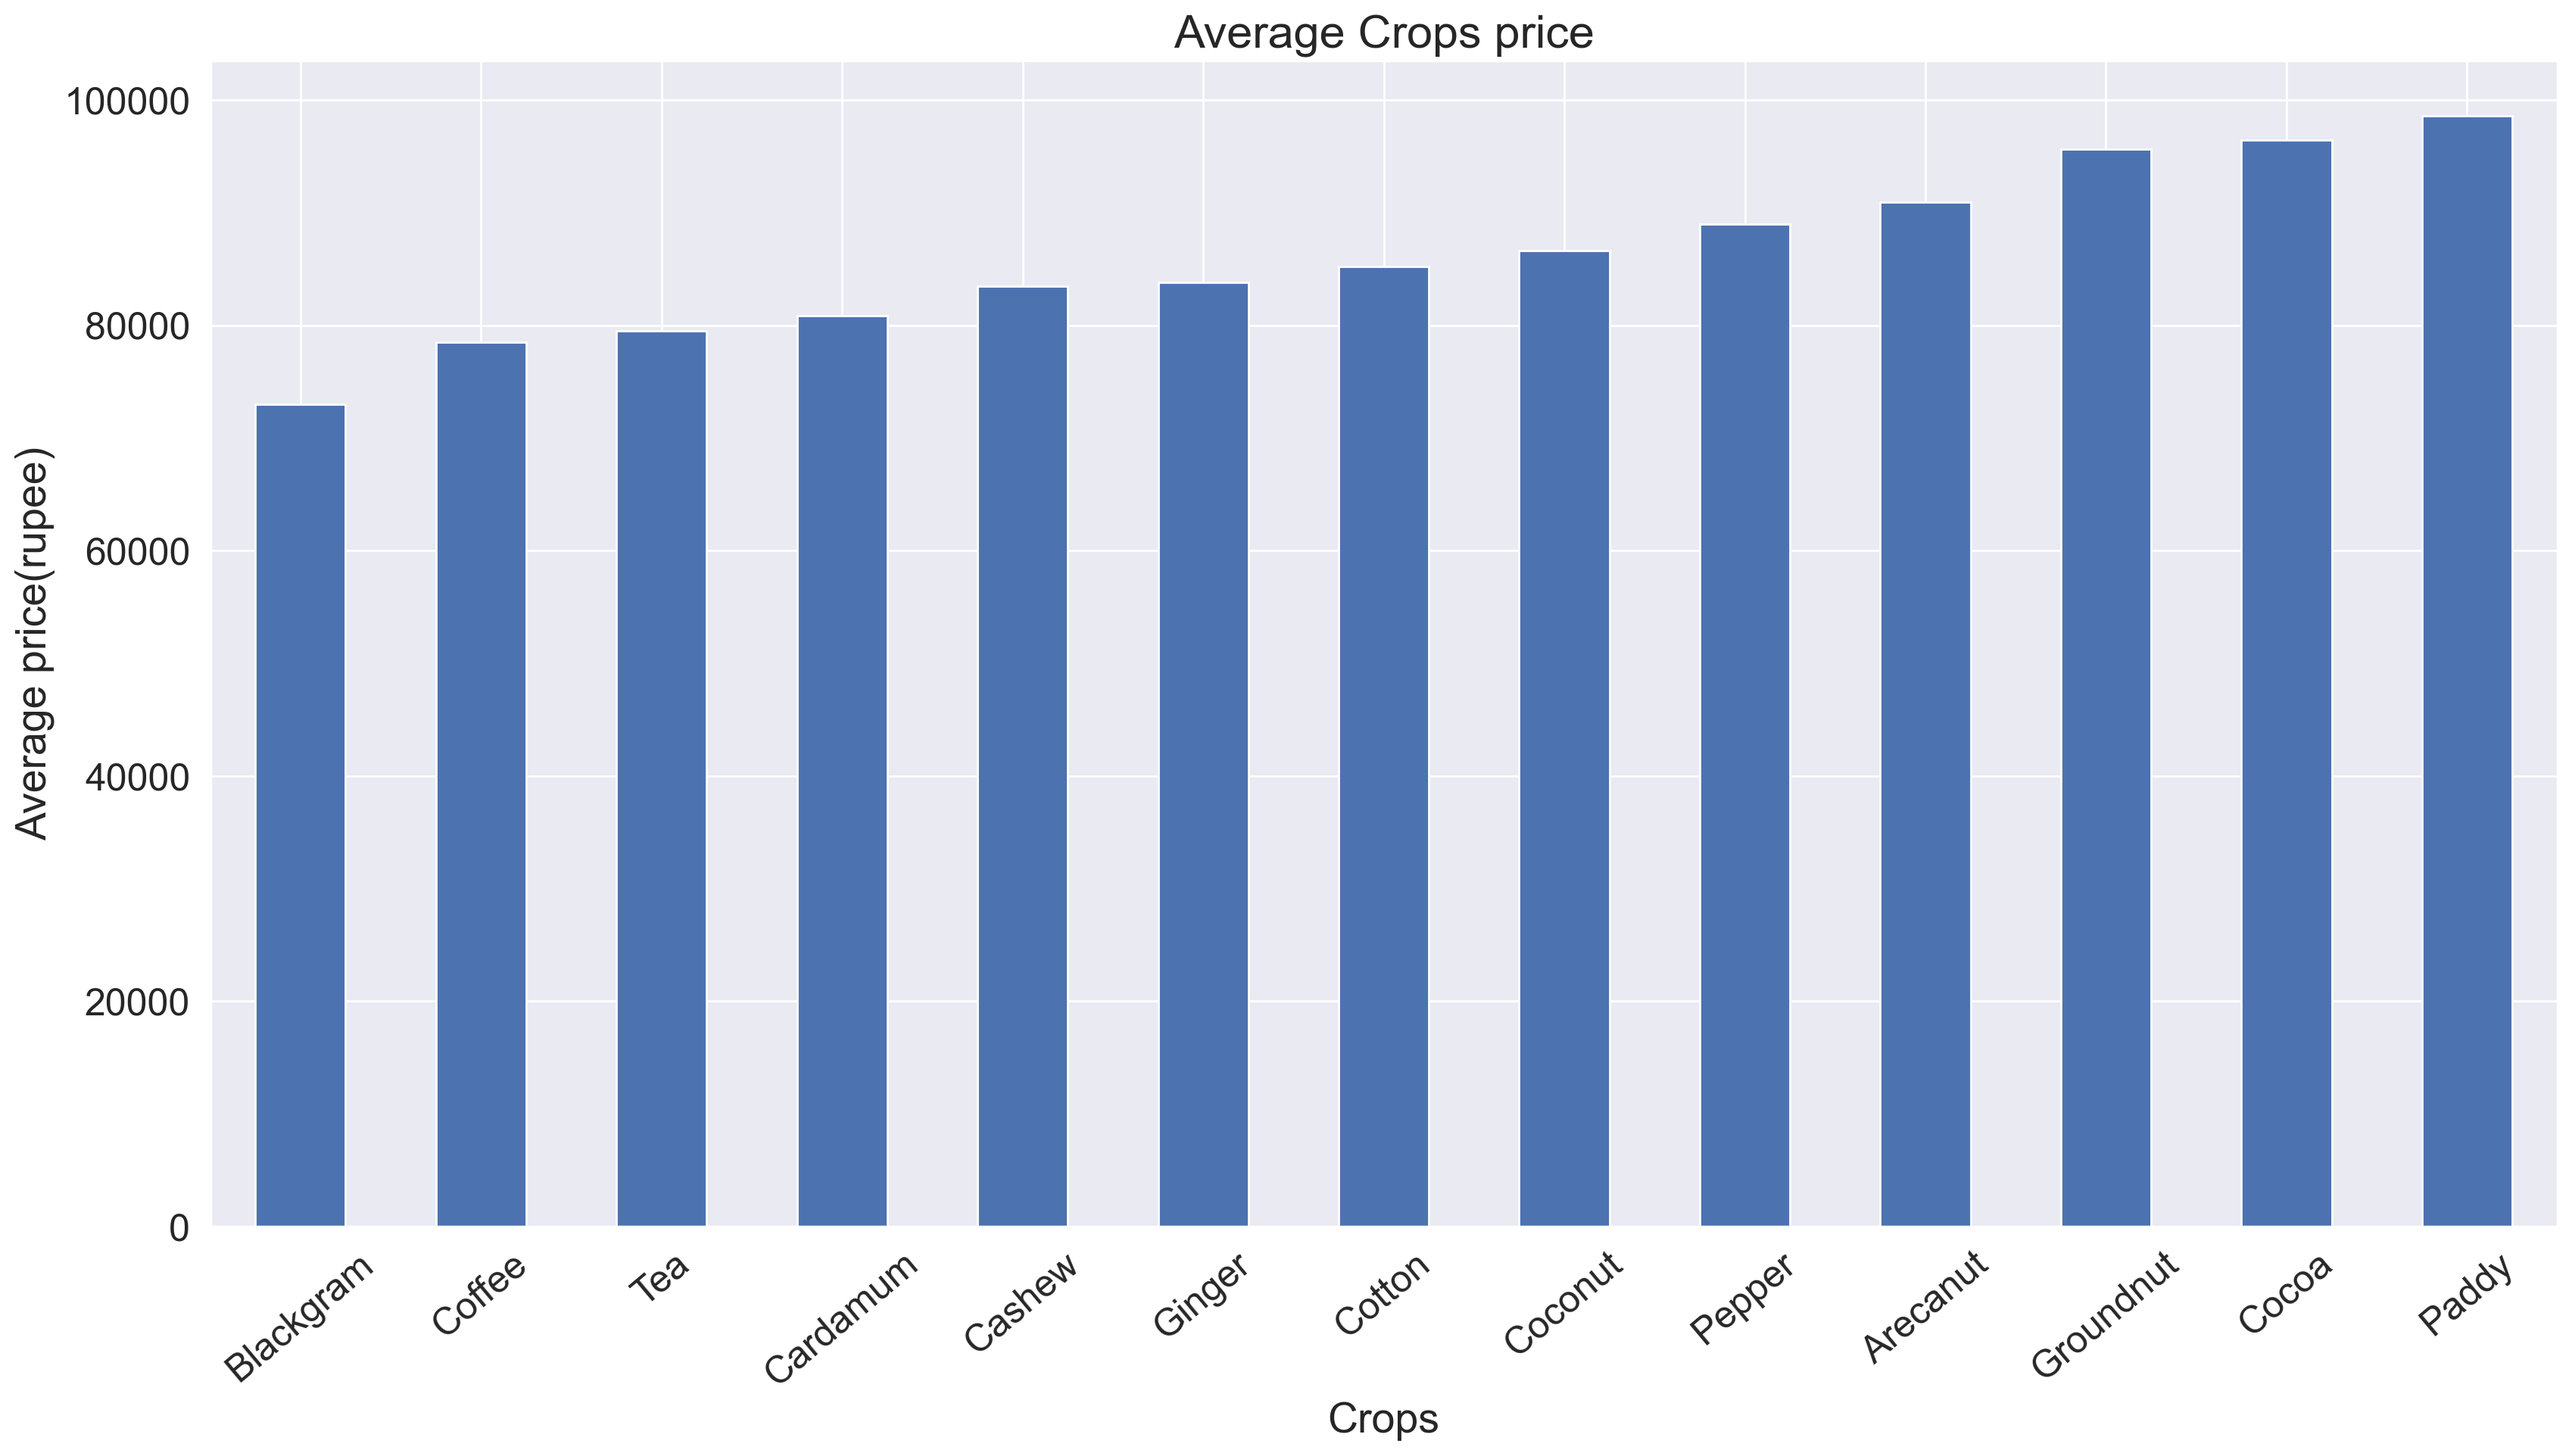

In [89]:
plt.figure(figsize=(20, 10), dpi=200)
df.groupby(["Crops"])["price"].mean().sort_values(ascending=True).plot(
    kind="bar"
)
plt.title("Average Crops price", fontsize=22)
plt.xlabel("Crops", fontsize=20)
plt.ylabel("Average price(rupee)",fontsize=20)
plt.xticks(rotation=40)
plt.tick_params(axis="both", labelsize=18)
plt.show()

Paddy has the highest price

# Thank you for watching